#**Proyecto Integrador Segundo Semestre**

Integrantes:

*   Andres Felipe Morales Martinez
*   Sun Yin Huang Huang
*   Laura Margarita Guerrero Guerra
*   Giovanny Gómez Convers

Universidad EAFIT

2023-2

## 01. Conexión Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## 02. Paths

### Paths

In [ ]:
path_bronze ='/content/gdrive/MyDrive/MCDA/2023-2/Integrador2/Dataset/Bronze/'
path_silver ='/content/gdrive/MyDrive/MCDA/2023-2/Integrador2/Dataset/Silver/'
path_gold   ='/content/gdrive/MyDrive/MCDA/2023-2/Integrador2/Dataset/Gold/'
path_salidas='/content/gdrive/MyDrive/MCDA/2023-2/Integrador2/Dataset/Salidas/'

In [ ]:
#Laura
path_bronze ='/content/gdrive/MyDrive/Maestria/2023-1/Proyecto_Integrador/Datos/Bronze/'
path_silver ='/content/gdrive/MyDrive/Maestria/2023-1/Proyecto_Integrador/Datos/Silver/'
path_gold   ='/content/gdrive/MyDrive/Maestria/2023-1/Proyecto_Integrador/Datos/Gold/'
path_salidas='/content/gdrive/MyDrive/Maestria/2023-1/Proyecto_Integrador/Salidas/'

## 03. Librerias

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## 04. Dataset

In [ ]:
# Convirtiendo en dataframe cada archivo de cada mes de los respectivos modulos
# ==============================================================================
archivos = ['Características generales, seguridad social en salud y educación.csv', 'Ocupados.csv']
anio = []

# Iterando
for i in range(1,13):
  print(f'mes: {i}')
  dfs = []
  path_mes = f'{path_bronze}{i:02}/'

  # Creando dataframes para cada uno de los archivos
  if i == 1:
    for filename in os.listdir(path_mes):
        if filename.lower() in [a.lower() for a in archivos]:
            df = pd.read_csv(os.path.join(path_mes, filename), sep=',', header=0, encoding='ISO-8859-1')
            dfs.append(df)

  else:
    for filename in os.listdir(path_mes):
        if filename.lower() in [a.lower() for a in archivos]:
            df = pd.read_csv(os.path.join(path_mes, filename), sep=';', header=0, encoding='ISO-8859-1')
            dfs.append(df)

  # Unificando los archivos para tener información de todo el mes
  merged = dfs[0]
  for i in range(1, len(dfs)):
      merged = pd.merge(merged, dfs[i], on=['DIRECTORIO', 'SECUENCIA_P', 'ORDEN'], how='outer')
  anio.append(merged)
  print(len(anio))

mes: 1
1
mes: 2
2
mes: 3
3
mes: 4
4
mes: 5
5
mes: 6
6
mes: 7
7
mes: 8
8
mes: 9
9
mes: 10
10
mes: 11
11
mes: 12
12


In [ ]:
 print(len(anio))

12


In [ ]:
# Unificando los meses para tener información de todo el anio
# ==============================================================================
geih_oci_2022 = anio[0]
for i in range(1, len(anio)):
    geih_oci_2022 = geih_oci_2022.append(anio[i])

In [ ]:
geih_oci_2022.shape

(919459, 273)

In [ ]:
geih_oci_2022.loc[:,'MES_x']

0         1
1         1
2         1
3         1
4         1
         ..
72841    12
72842    12
72843    12
72844    12
72845    12
Name: MES_x, Length: 919459, dtype: int64

In [ ]:
# Informacion que tenemos de cada mes
geih_oci_2022['MES'] = np.where((geih_oci_2022['MES_x'].isna()), geih_oci_2022['MES_y'], geih_oci_2022['MES_x'])

In [ ]:
geih_oci_2022['MES'].value_counts(dropna=False)

1.0     80116
2.0     79783
3.0     78595
6.0     77999
4.0     77679
5.0     77380
8.0     76625
7.0     75963
9.0     75382
11.0    73614
10.0    73477
12.0    72846
Name: MES, dtype: int64

In [ ]:
geih_oci_2022.head(10)

,DIRECTORIO,SECUENCIA_P,ORDEN,P6016,P3271,P6030S1,P6030S3,P6040,P6050,P6083,...,P3062S9,P3063S1,P3064S1,P3366,PER_y,REGIS_y,P3044S2,P6420S2,PT,MES
0,5000000,1,1,1,1,3.0,1988.0,33,1,1,...,NaN,NaN,NaN,NaN,2022.0,60.0,NaN,NaN,NaN,1.0
1,5000000,1,2,2,2,12.0,1990.0,31,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,5000000,1,3,3,2,4.0,2010.0,11,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,5000000,1,4,2,2,4.0,2016.0,5,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,5000000,1,5,2,1,7.0,2018.0,3,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,5000000,1,6,6,2,6.0,1945.0,76,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,5000001,1,1,1,1,8.0,1963.0,58,1,3,...,NaN,NaN,NaN,NaN,2022.0,60.0,NaN,NaN,NaN,1.0
7,5000001,1,2,2,2,9.0,1960.0,61,2,3,...,NaN,NaN,NaN,NaN,2022.0,60.0,NaN,NaN,NaN,1.0
8,5000001,1,3,3,1,8.0,1985.0,36,3,1,...,NaN,NaN,NaN,NaN,2022.0,60.0,NaN,NaN,NaN,1.0
9,5000002,1,1,1,2,2.0,2001.0,20,1,2,...,NaN,NaN,NaN,NaN,2022.0,60.0,NaN,NaN,NaN,1.0


In [ ]:
#Inclusion de la variable de inflacion, medida a traves de la variacion (mensual) del IPC.

# Mapear los valores específicos de la variacion del IPC según el mes (tomados del DANE)
mapeo_meses = {
    1: 1.67,
    2: 1.63,
    3: 1.00,
    4: 1.25,
    5: 0.84,
    6: 0.51,
    7: 0.81,
    8: 1.02,
    9: 0.93,
    10: 0.72,
    11: 0.77,
    12: 1.26
}

# Aplicar el mapeo a la columna 'Mes' y asignar los resultados a la nueva columna 'VariacionIPC'
geih_oci_2022['VariacionIPC'] = geih_oci_2022['MES'].map(mapeo_meses)

In [ ]:
#Inclusion de la variable de desempleo (Bloomberg)
desempleo = {
    1: 10.82,
    2: 9.11,
    3: 9.1,
    4: 10.45,
    5: 10.82,
    6: 11.27,
    7: 11.73,
    8: 11.02,
    9: 11.05,
    10: 12.64,
    11: 12.72,
    12: 14.83
}

geih_oci_2022['desempleo'] = geih_oci_2022['MES'].map(desempleo)

In [ ]:
#Inclusion de la variable tasa de interes a empresas (Bloomberg)
tasa = {
    1: 8.77,
    2: 9.88,
    3: 10.53,
    4: 11.4,
    5: 12.15,
    6: 12.71,
    7: 14.25,
    8: 15.42,
    9: 16.36,
    10: 17.66,
    11: 18.49,
    12: 19.59
}

geih_oci_2022['tasa'] = geih_oci_2022['MES'].map(tasa)

In [ ]:
geih_oci_2022['CLASE'] = np.where((geih_oci_2022['CLASE_x'].isna()), geih_oci_2022['CLASE_y'], geih_oci_2022['CLASE_x'])

In [ ]:
geih_oci_2022['AREA'] = np.where((geih_oci_2022['AREA_x'].isna()), geih_oci_2022['AREA_y'], geih_oci_2022['AREA_x'])

In [ ]:
geih_oci_2022['PERIODO'] = np.where((geih_oci_2022['PERIODO_x'].isna()), geih_oci_2022['PERIODO_y'], geih_oci_2022['PERIODO_x'])

In [ ]:
geih_oci_2022['DPTO'] = np.where((geih_oci_2022['DPTO_x'].isna()), geih_oci_2022['DPTO_y'], geih_oci_2022['DPTO_x'])

In [ ]:
geih_oci_2022['FEX_C18'] = np.where((geih_oci_2022['FEX_C18_x'].isna()), geih_oci_2022['FEX_C18_y'], geih_oci_2022['FEX_C18_x'])

### Bronze

In [ ]:
# Guardar en bronze
#geih_oci_2022.to_csv(path_bronze + 'geih_oci_2022.csv', index=False)

## 05. Pre-procesamiento y limpieza

### 05.0. Cargue

In [ ]:
# Variables relevantes
# ==============================================================================
variables = ['DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 'P3271', 'P6040', 'P6050', 'P6080', 'P6090', 'P7020',
             'P6100', 'P3042', 'CLASE', 'AREA', 'MES', 'PERIODO', 'DPTO', 'FEX_C18', 'P6920', 'P9440',
             'OCI', 'INGLABO','P6915', 'P6426', 'LGBT_Numerica', 'Discapacidad', 'Dificultad', 'Campesina', 'VariacionIPC', 'desempleo', 'tasa']

In [ ]:
muestra = geih_oci_2022[variables]

In [ ]:
# Rename
# ==============================================================================
nuevos_nombres = {'P3271': 'SEXO', 'P6040': 'EDAD', 'P6050': 'PARENTESCO', 'P6080': 'ETNIA', 'P6090': 'SALUD', 'P7020': 'TRABAJO',
                  'P6100': 'REGIMEN', 'P3042': 'EDUCACION', 'P6920': 'PENSION', 'P9440': 'INTERNET', 'P6915': 'SALUD2', 'P6426': 'TIEMPO_OCI'}
muestra.rename(columns=nuevos_nombres, inplace=True)

In [ ]:
# Ordenar el dataframe
# ==============================================================================
muestra = muestra.sort_values(by=['DIRECTORIO', 'SECUENCIA_P'])

In [ ]:
muestra

,DIRECTORIO,SECUENCIA_P,ORDEN,SEXO,EDAD,PARENTESCO,ETNIA,SALUD,TRABAJO,REGIMEN,...,INGLABO,SALUD2,TIEMPO_OCI,LGBT_Numerica,Discapacidad,Dificultad,Campesina,VariacionIPC,desempleo,tasa
0,5000000,1,1,1,33,1,6,2,1.0,NaN,...,768000.0,4.0,36.0,0.0,0.0,0.0,0,1.67,10.82,8.77
1,5000000,1,2,2,31,2,6,2,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,1,1.67,10.82,8.77
2,5000000,1,3,2,11,3,6,2,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0,1.67,10.82,8.77
3,5000000,1,4,2,5,3,6,2,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0,1.67,10.82,8.77
4,5000000,1,5,1,3,3,6,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1.67,10.82,8.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72841,7309049,1,3,2,14,3,6,1,NaN,3.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0,1.26,14.83,19.59
72842,7309050,1,1,1,53,1,6,1,1.0,3.0,...,800000.0,2.0,24.0,0.0,0.0,0.0,0,1.26,14.83,19.59
72843,7309050,1,2,2,30,2,6,2,1.0,NaN,...,600000.0,6.0,24.0,0.0,0.0,0.0,0,1.26,14.83,19.59
72844,7309050,1,3,1,11,3,6,2,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0,1.26,14.83,19.59


### 05.1. Filtros

#### Hogares que se componen por un padre/madre e hijo

In [ ]:
muestra.groupby('PARENTESCO')[['DIRECTORIO']].count()

,DIRECTORIO
PARENTESCO,
1,304459
2,153268
3,321465
4,14735
5,4320
6,17483
7,10748
8,56757
9,23684


In [ ]:
# Información de al menos un hijo
muestra['aux_hijo'] = (muestra['PARENTESCO'] == 3).astype(int)

In [ ]:
muestra.head(10)

,DIRECTORIO,SECUENCIA_P,ORDEN,SEXO,EDAD,PARENTESCO,ETNIA,SALUD,TRABAJO,REGIMEN,...,SALUD2,TIEMPO_OCI,LGBT_Numerica,Discapacidad,Dificultad,Campesina,VariacionIPC,desempleo,tasa,aux_hijo
0,5000000,1,1,1,33,1,6,2,1.0,NaN,...,4.0,36.0,0.0,0.0,0.0,0,1.67,10.82,8.77,0
1,5000000,1,2,2,31,2,6,2,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,1,1.67,10.82,8.77,0
2,5000000,1,3,2,11,3,6,2,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0,1.67,10.82,8.77,1
3,5000000,1,4,2,5,3,6,2,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0,1.67,10.82,8.77,1
4,5000000,1,5,1,3,3,6,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1.67,10.82,8.77,1
5,5000000,1,6,2,76,4,6,2,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0,1.67,10.82,8.77,0
6,5000001,1,1,1,58,1,6,1,1.0,3.0,...,2.0,36.0,0.0,0.0,0.0,0,1.67,10.82,8.77,0
7,5000001,1,2,2,61,2,6,1,1.0,3.0,...,2.0,72.0,0.0,0.0,0.0,0,1.67,10.82,8.77,0
8,5000001,1,3,1,36,3,6,1,1.0,3.0,...,2.0,12.0,0.0,0.0,0.0,0,1.67,10.82,8.77,1
9,5000002,1,1,2,20,1,6,2,1.0,NaN,...,4.0,6.0,0.0,0.0,0.0,0,1.67,10.82,8.77,0


In [ ]:
# Agrupar la variable auxiliar para todo el hogar
muestra['hijo'] = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['aux_hijo'].transform('max')

In [ ]:
muestra.groupby('hijo')[['DIRECTORIO']].count()

,DIRECTORIO
hijo,
0,203201
1,716258


In [ ]:
# Borrar la información de hogares que no tienen hijos
muestra = muestra[muestra['hijo'] == 1]
#muestra

#### Hijo ocupado

In [ ]:
muestra.groupby(['OCI','PARENTESCO'])[['DIRECTORIO']].count()

DIRECTORIO
OCI PARENTESCO            
1.0 1               126326
    2                57918
    3                71614
    4                 1260
    5                  530
    6                 3659
    7                 6342
    8                 3067
    9                 3487
    10                 957
    11                  58
    12                  52
    13                2016

In [ ]:
# Hijo ocupado
#muestra[(muestra['PARENTESCO'] == 3) & (muestra['OCI'] == 1)]
muestra['aux_oci'] = np.where((muestra['PARENTESCO'] == 3) & (muestra['OCI'] == 1), 1, 0)

In [ ]:
# Agrupar la variable auxiliar para todo el hogar
muestra['hijo_oci'] = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['aux_oci'].transform('max')

In [ ]:
muestra.groupby('hijo_oci')[['DIRECTORIO']].count()

,DIRECTORIO
hijo_oci,
0,475033
1,241225


In [ ]:
# Borrar la información de hogares que no tienen hijos
muestra = muestra[muestra['hijo_oci'] == 1]
#muestra

#### Primer trabajo del hijo

In [ ]:
# Antes del actual trabajo, ¿...Tuvo otro trabajo? 1. Si, 2. No
muestra.groupby(['TRABAJO','PARENTESCO'])[['DIRECTORIO']].count()

DIRECTORIO
TRABAJO PARENTESCO            
1.0     1                20951
        2                 7914
        3                40099
        4                   89
        5                   40
        6                  547
        7                 2995
        8                 1051
        9                  710
        10                 121
        11                  17
        12                  15
        13                 470
2.0     1                10090
        2                 4848
        3                31515
        4                   47
        5                   12
        6                  283
        7                 1563
        8                 1198
        9                  469
        10                  67
        11                  11
        13                 234

In [ ]:
# Hijo ocupado con su primer trabajo
#muestra[(muestra['PARENTESCO'] == 3) & (muestra['TRABAJO'] == 2)]
muestra['aux_primer'] = np.where((muestra['PARENTESCO'] == 3) & (muestra['TRABAJO'] == 2), 1, 0)

In [ ]:
# Agrupar la variable auxiliar para todo el hogar
muestra['primer'] = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['aux_primer'].transform('max')

In [ ]:
muestra.groupby('primer')[['DIRECTORIO']].count()

,DIRECTORIO
primer,
0,120716
1,120509


In [ ]:
# Borrar la información de hogares que no tienen hijos
muestra = muestra[muestra['primer'] == 1]
#muestra

In [ ]:
# Cantidad de hogares únicos
len(np.unique(muestra[['DIRECTORIO','SECUENCIA_P']]))

27817

### 05.2. Variables


#### Sexo (1: Mujer, 0: Hombre)

In [ ]:
# Padre
# ==============================================================================
muestra.loc[muestra['PARENTESCO'] == 1, 'SEXO'].value_counts().sort_index()

1    12087
2    15745
Name: SEXO, dtype: int64

In [ ]:
# Categorias
muestra['aux_jefe_hom'] = np.where((muestra['SEXO'] == 1) & (muestra['PARENTESCO'] == 1), 1, 0)
muestra['aux_jefe_muj'] = np.where((muestra['SEXO'] == 2) & (muestra['PARENTESCO'] == 1), 1, 0)

In [ ]:
muestra.value_counts(['aux_jefe_hom', 'aux_jefe_muj']).sort_index()

aux_jefe_hom  aux_jefe_muj
0             0               92677
              1               15745
1             0               12087
dtype: int64

In [ ]:
# Para toda la muestra
muestra['jefe_hombre'] = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['aux_jefe_hom'].transform('max')
muestra['jefe_mujer']  = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['aux_jefe_muj'].transform('max')

In [ ]:
# Hijo
# ==============================================================================
muestra.loc[muestra['PARENTESCO'] == 3, 'SEXO'].value_counts().sort_index()

1    30632
2    24083
Name: SEXO, dtype: int64

In [ ]:
# Categorias
muestra['hijo_hombre'] = np.where((muestra['SEXO'] == 1) & (muestra['PARENTESCO'] == 3), 1, 0)
muestra['hijo_mujer']  = np.where((muestra['SEXO'] == 2) & (muestra['PARENTESCO'] == 3), 1, 0)

In [ ]:
muestra.value_counts(['hijo_hombre', 'hijo_mujer']).sort_index()

hijo_hombre  hijo_mujer
0            0             65794
             1             24083
1            0             30632
dtype: int64

#### Edad

In [ ]:
# Padre
# ==============================================================================
muestra['aux_edad_jefe'] = np.where(muestra['PARENTESCO'] == 1, muestra['EDAD'], None)

In [ ]:
# Para toda la muestra
muestra['edad_jefe'] = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['aux_edad_jefe'].transform('max')

In [ ]:
# Hijo
# ==============================================================================
muestra['edad_hijo'] = np.where(muestra['PARENTESCO'] == 3, muestra['EDAD'], None).astype(float)

In [ ]:
# Variable de juventud
muestra['hijo_joven'] = np.where(muestra['edad_hijo'] <= 26, 1, 0)

#### Educación

In [ ]:
# Padre
# ==============================================================================
muestra.loc[muestra['PARENTESCO'] == 1, 'EDUCACION'].value_counts().sort_index()

1.0      1963
2.0         8
3.0     10569
4.0      3834
5.0      6645
6.0       342
7.0        55
8.0      1388
9.0       513
10.0     1867
11.0      495
12.0      131
13.0       22
Name: EDUCACION, dtype: int64

In [ ]:
# Categorias
muestra['aux_jefe_ninguno']    = np.where( (muestra['EDUCACION'] == 1)                                                         & (muestra['PARENTESCO'] == 1), 1, 0)
muestra['aux_jefe_primaria']   = np.where(((muestra['EDUCACION'] == 2)  | (muestra['EDUCACION'] == 3))                             & (muestra['PARENTESCO'] == 1), 1, 0)
muestra['aux_jefe_secundaria'] = np.where( (muestra['EDUCACION'] == 4)                                                         & (muestra['PARENTESCO'] == 1), 1, 0)
muestra['aux_jefe_media']      = np.where(((muestra['EDUCACION'] == 5)  | (muestra['EDUCACION'] == 6)  | (muestra['EDUCACION'] == 7))  & (muestra['PARENTESCO'] == 1), 1, 0)
muestra['aux_jefe_tecnica']    = np.where(((muestra['EDUCACION'] == 8)  | (muestra['EDUCACION'] == 9))                             & (muestra['PARENTESCO'] == 1), 1, 0)
muestra['aux_jefe_pregrado']   = np.where( (muestra['EDUCACION'] == 10)                                                        & (muestra['PARENTESCO'] == 1), 1, 0)
muestra['aux_jefe_posgrado']   = np.where(((muestra['EDUCACION'] == 11) | (muestra['EDUCACION'] == 12) | (muestra['EDUCACION'] == 13)) & (muestra['PARENTESCO'] == 1), 1, 0)

In [ ]:
# Para toda la muestra
muestra['jefe_ninguno']    = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['aux_jefe_ninguno'].transform('max')
muestra['jefe_primaria']   = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['aux_jefe_primaria'].transform('max')
muestra['jefe_secundaria'] = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['aux_jefe_secundaria'].transform('max')
muestra['jefe_media']      = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['aux_jefe_media'].transform('max')
muestra['jefe_tecnica']    = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['aux_jefe_tecnica'].transform('max')
muestra['jefe_pregrado']   = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['aux_jefe_pregrado'].transform('max')
muestra['jefe_posgrado']   = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['aux_jefe_posgrado'].transform('max')

In [ ]:
# Hijo
# ==============================================================================
muestra.loc[muestra['PARENTESCO'] == 3, 'EDUCACION'].value_counts().sort_index()

1.0      1278
2.0       417
3.0      6724
4.0      9983
5.0     17069
6.0      1357
7.0        90
8.0      4454
9.0      1899
10.0    10160
11.0      646
12.0      282
13.0       17
Name: EDUCACION, dtype: int64

In [ ]:
# Categorias
muestra['hijo_ninguno']    = np.where( (muestra['EDUCACION'] == 1)                                                         & (muestra['PARENTESCO'] == 3), 1, 0)
muestra['hijo_primaria']   = np.where(((muestra['EDUCACION'] == 2)  | (muestra['EDUCACION'] == 3))                             & (muestra['PARENTESCO'] == 3), 1, 0)
muestra['hijo_secundaria'] = np.where( (muestra['EDUCACION'] == 4)                                                         & (muestra['PARENTESCO'] == 3), 1, 0)
muestra['hijo_media']      = np.where(((muestra['EDUCACION'] == 5)  | (muestra['EDUCACION'] == 6)  | (muestra['EDUCACION'] == 7))  & (muestra['PARENTESCO'] == 3), 1, 0)
muestra['hijo_tecnica']    = np.where(((muestra['EDUCACION'] == 8)  | (muestra['EDUCACION'] == 9))                             & (muestra['PARENTESCO'] == 3), 1, 0)
muestra['hijo_pregrado']   = np.where( (muestra['EDUCACION'] == 10)                                                        & (muestra['PARENTESCO'] == 3), 1, 0)
muestra['hijo_posgrado']   = np.where(((muestra['EDUCACION'] == 11) | (muestra['EDUCACION'] == 12) | (muestra['EDUCACION'] == 13)) & (muestra['PARENTESCO'] == 3), 1, 0)

#### Raza

In [ ]:
# Padre
# ==============================================================================
muestra.loc[muestra['PARENTESCO'] == 1, 'ETNIA'].value_counts().sort_index()

1     1128
2        3
3       85
4       25
5     2367
6    24224
Name: ETNIA, dtype: int64

In [ ]:
# Categoria
muestra['aux_jefe_raza'] = np.where((muestra['ETNIA'] != 6) & (muestra['PARENTESCO'] == 1), 1, 0)

In [ ]:
muestra['aux_jefe_raza'].value_counts()

0    116901
1      3608
Name: aux_jefe_raza, dtype: int64

In [ ]:
# Para toda la muestra
muestra['jefe_raza'] = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['aux_jefe_raza'].transform('max')

In [ ]:
# Hijo
# ==============================================================================
muestra.loc[muestra['PARENTESCO'] == 3, 'ETNIA'].value_counts().sort_index()

1     2313
2        5
3      166
4       32
5     4495
6    47704
Name: ETNIA, dtype: int64

In [ ]:
# Categoria
muestra['hijo_raza'] = np.where((muestra['ETNIA'] != 6) & (muestra['PARENTESCO'] == 3), 1, 0)

In [ ]:
muestra['hijo_raza'].value_counts()

0    113498
1      7011
Name: hijo_raza, dtype: int64

#### Formal e informal (1: Formal, 0: Informal)

In [ ]:
# Creando variables de seguridad social
# ==============================================================================
muestra['salud']   = np.where((muestra['SALUD']==1) & ((muestra['REGIMEN']==1) | (muestra['REGIMEN']==2)) & (muestra['SALUD2']==1), 1, None)
muestra['pension'] = np.where(muestra['PENSION']==1, 1, None)

In [ ]:
# Variable de formalidad
# ==============================================================================
muestra['formal']  = np.where((muestra['salud']==1) & (muestra['pension']==1), 1, None)

In [ ]:
# Padre
# =============================================================================
muestra.loc[muestra['PARENTESCO'] == 1, 'formal'].value_counts().sort_index()

1    4719
Name: formal, dtype: int64

In [ ]:
# Categorias
muestra['aux_jefe_formal']   = np.where((muestra['formal'] == 1) & (muestra['PARENTESCO'] == 1), 1, 0)
muestra['aux_jefe_informal'] = np.where((muestra['formal'] != 1) & (muestra['PARENTESCO'] == 1), 1, 0)

In [ ]:
muestra[['aux_jefe_formal', 'aux_jefe_informal']].value_counts()

aux_jefe_formal  aux_jefe_informal
0                0                    92677
                 1                    23113
1                0                     4719
dtype: int64

In [ ]:
# Para toda la muestra
muestra['jefe_formal']   = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['aux_jefe_formal'].transform('max')
muestra['jefe_informal'] = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['aux_jefe_informal'].transform('max')

In [ ]:
# Hijo
# =============================================================================
muestra.loc[muestra['PARENTESCO'] == 3, 'formal'].value_counts().sort_index()

1    12904
Name: formal, dtype: int64

In [ ]:
# Categoria
muestra['hijo_formal'] = np.where((muestra['formal'] == 1) & (muestra['PARENTESCO'] == 3), 1, 0)

In [ ]:
muestra[['hijo_formal']].value_counts()

hijo_formal
0              107605
1               12904
dtype: int64

#### Del hogar

##### Zona

In [ ]:
# Zona (1: urbano, 2: rural)
# ==============================================================================
muestra.groupby('CLASE')[['DIRECTORIO']].count()

,DIRECTORIO
CLASE,
1.0,104362
2.0,16147


In [ ]:
# Categorias
muestra['aux_urbana'] = np.where(muestra['CLASE'] == 1, 1, 0)
muestra['aux_rural']  = np.where(muestra['CLASE'] == 2, 1, 0)

In [ ]:
muestra[['aux_urbana', 'aux_rural']].value_counts()

aux_urbana  aux_rural
1           0            104362
0           1             16147
dtype: int64

In [ ]:
# Para toda la muestra
muestra['urbana'] = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['aux_urbana'].transform('max')
muestra['rural']  = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['aux_rural'].transform('max')

##### Miembros del hogar

In [ ]:
muestra['prueba'] = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['DIRECTORIO'].transform('count')

In [ ]:
muestra.loc[muestra['PARENTESCO'] <= 5, 'prueba2'] = muestra[muestra['PARENTESCO'] <= 5].groupby(['DIRECTORIO', 'SECUENCIA_P'])['DIRECTORIO'].transform('count')

In [ ]:
# Para toda la muestra
muestra['miembros'] = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['prueba2'].transform('max').astype(int)

In [ ]:
#muestra[['DIRECTORIO', 'PARENTESCO', 'prueba', 'prueba2', 'miembros']].head(30)

##### Logaritmo del ingreso per capita de los padres

In [ ]:
muestra.loc[muestra['PARENTESCO'] <= 2, 'aux'] = muestra[muestra['PARENTESCO'] <= 2].groupby(['DIRECTORIO', 'SECUENCIA_P'])['INGLABO'].transform('sum')

In [ ]:
# Para toda la muestra
muestra['ing_padres'] = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['aux'].transform('max')

In [ ]:
# Logaritmo
muestra['Ling_padres'] = np.where(muestra['ing_padres'] != 0, np.log(muestra['ing_padres']), 0)

In [ ]:
#muestra[['DIRECTORIO', 'PARENTESCO', 'INGLABO', 'aux', 'ing_padres', 'Ling_padres']].head(30)

##### Composición del hogar

In [ ]:
# ¿Jefe y pareja existe?
muestra['jefe'] = np.where(muestra['PARENTESCO'] == 1, 1, 0)
muestra['jefe_existe'] = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['jefe'].transform('max')

muestra['pareja'] = np.where(muestra['PARENTESCO'] == 2, 1, 0)
muestra['pareja_existe'] = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['pareja'].transform('max')

In [ ]:
# Hogar nuclear
muestra['hogar_nuclear'] = np.where((muestra['jefe_existe'] == 1) & (muestra['pareja_existe'] == 1), 1, 0)

In [ ]:
# Hogar monoparental padre
muestra['hogar_padre'] = np.where((muestra['jefe_existe'] == 1) & (muestra['pareja_existe'] == 0) & (muestra['jefe_hombre'] == 1), 1, 0)

In [ ]:
# Hogar monoparental madre
muestra['hogar_madre'] = np.where((muestra['jefe_existe'] == 1) & (muestra['pareja_existe'] == 0) & (muestra['jefe_mujer'] == 1), 1, 0)

In [ ]:
 #muestra[['DIRECTORIO', 'PARENTESCO', 'SEXO', 'pareja_existe', 'jefe_hombre', 'jefe_mujer', 'hogar_nuclear', 'hogar_padre', 'hogar_madre']].head(30)

#### Otras variables

In [ ]:
# Internet
# ==============================================================================
muestra['internet'] = np.where(muestra['INTERNET'] == 1, 1, 0)

In [ ]:
# Comunidad LGBT
# ==============================================================================
muestra['lgbt'] = np.where(muestra['LGBT_Numerica'] == 1, 1, 0)

In [ ]:
# Discapacidad
# ==============================================================================
muestra['discapacidad'] = np.where(muestra['Discapacidad'] == 1, 1, 0)

In [ ]:
# Dificultad
# ==============================================================================
muestra['dificultad'] = np.where(muestra['Dificultad'] == 1, 1, 0)

In [ ]:
# Campesino
# ==============================================================================
muestra['campesino'] = np.where(muestra['Campesina'] == 1, 1, 0)

In [ ]:
# Departamento
# ==============================================================================
muestra['DPTO'].value_counts().sort_index()

5.0     6614
8.0     7259
11.0    3211
13.0    8009
15.0    4406
17.0    4403
18.0    2594
19.0    4451
20.0    5052
23.0    3805
25.0    2006
27.0    3655
41.0    4921
44.0    4220
47.0    6367
50.0    3229
52.0    5162
54.0    5321
63.0    3712
66.0    5166
68.0    5495
70.0    7206
73.0    3538
76.0    3747
81.0     522
85.0     515
86.0     522
88.0    2065
91.0    1137
94.0     510
95.0     304
97.0    1099
99.0     286
Name: DPTO, dtype: int64

In [ ]:
# Categorias
muestra['antioquia']    = np.where(muestra['DPTO'] == 5 , 1, 0)
muestra['atlantico']    = np.where(muestra['DPTO'] == 8 , 1, 0)
muestra['bogota']       = np.where(muestra['DPTO'] == 11, 1, 0)
muestra['bolivar']      = np.where(muestra['DPTO'] == 13, 1, 0)
muestra['boyaca']       = np.where(muestra['DPTO'] == 15, 1, 0)
muestra['caldas']       = np.where(muestra['DPTO'] == 17, 1, 0)
muestra['caqueta']      = np.where(muestra['DPTO'] == 18, 1, 0)
muestra['cauca']        = np.where(muestra['DPTO'] == 19, 1, 0)
muestra['cesar']        = np.where(muestra['DPTO'] == 20, 1, 0)
muestra['cordoba']      = np.where(muestra['DPTO'] == 23, 1, 0)
muestra['cundinamarca'] = np.where(muestra['DPTO'] == 25, 1, 0)
muestra['choco']        = np.where(muestra['DPTO'] == 27, 1, 0)
muestra['huila']        = np.where(muestra['DPTO'] == 41, 1, 0)
muestra['guajira']      = np.where(muestra['DPTO'] == 44, 1, 0)
muestra['magdalena']    = np.where(muestra['DPTO'] == 47, 1, 0)
muestra['meta']         = np.where(muestra['DPTO'] == 50, 1, 0)
muestra['narino']       = np.where(muestra['DPTO'] == 52, 1, 0)
muestra['norte']        = np.where(muestra['DPTO'] == 54, 1, 0)
muestra['quindio']      = np.where(muestra['DPTO'] == 63, 1, 0)
muestra['risaralda']    = np.where(muestra['DPTO'] == 66, 1, 0)
muestra['santander']    = np.where(muestra['DPTO'] == 68, 1, 0)
muestra['sucre']        = np.where(muestra['DPTO'] == 70, 1, 0)
muestra['tolima']       = np.where(muestra['DPTO'] == 73, 1, 0)
muestra['valle']        = np.where(muestra['DPTO'] == 76, 1, 0)
muestra['otros']        = np.where(muestra['DPTO'] >  76, 1, 0)

In [ ]:
#muestra['otros'].value_counts()

### 05.3. Individuo

#### Hijos

In [ ]:
muestra['PARENTESCO'].value_counts()

3     54715
1     27832
8     14777
2     14527
7      3584
9      1997
4       965
13      836
6       798
5       378
10       83
11       13
12        4
Name: PARENTESCO, dtype: int64

In [ ]:
# Quedandonos solo con información de los hijos
muestra = muestra[muestra['PARENTESCO'] == 3]

#### Hijos ocupados

In [ ]:
muestra['OCI'].value_counts()

1.0    36143
Name: OCI, dtype: int64

In [ ]:
# Quedandonos solo con información de los hijos ocupados
muestra = muestra[muestra['OCI'] == 1]

#### Hijos ocupados con el primer trabajo

In [ ]:
muestra['TRABAJO'].value_counts()

2.0    31515
1.0     4628
Name: TRABAJO, dtype: int64

In [ ]:
# Quedandonos solo con la información del hijo ocupado que tiene el primer trabajo
muestra = muestra[muestra['TRABAJO'] == 2]

#### Hijos ocupados con el primer trabajo y mayor edad

In [ ]:
# Todavia tenemos hijos del mismo hogar, el objetivo es quedarnos con solo uno para aislar unicamente la conexión de sus padres
# Proxy del primer hijo que entró al mercado laboral
muestra.shape[0]

31515

In [ ]:
# La muestra debe quedar con este tamaño
muestra['DIRECTORIO'].nunique()

27812

In [ ]:
# Procedemos a quedarnos con el hijo de mayor edad
muestra['hijo_mayor'] = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['EDAD'].transform('max')

In [ ]:
#muestra[['DIRECTORIO', 'PARENTESCO', 'EDAD', 'hijo_mayor']].head(30)

In [ ]:
# Eliminado demás hijos
muestra = muestra[muestra['EDAD'] == muestra['hijo_mayor']]

#### Hijos ocupados con el primer trabajo, mayor edad y mayor tiempo trabajando

In [ ]:
# Seguimos con duplicados
muestra['aux_dup'] = muestra.duplicated('DIRECTORIO')

In [ ]:
muestra.groupby('aux_dup')['DIRECTORIO'].count()

aux_dup
False    27812
True        98
Name: DIRECTORIO, dtype: int64

In [ ]:
muestra['dup'] = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['aux_dup'].transform('max')

In [ ]:
# Dado que son hijos ocupados con el primer trabajo y misma edad, nos quedamos con aquellos que tengan mas tiempo en el trabajo
muestra['hijo_tiempo'] = muestra.groupby(['DIRECTORIO', 'SECUENCIA_P'])['TIEMPO_OCI'].transform('max')

In [ ]:
#muestra.loc[muestra['dup'] == 1, ['DIRECTORIO', 'PARENTESCO', 'EDAD', 'TIEMPO_OCI', 'hijo_mayor', 'hijo_tiempo']].head(30)

In [ ]:
# Eliminando los demas
muestra = muestra[muestra['TIEMPO_OCI'] == muestra['hijo_tiempo']]

#### Aleatorio

In [ ]:
# Seguimos con duplicados
muestra['dup2'] = muestra.duplicated('DIRECTORIO')

In [ ]:
muestra.groupby('dup2')['DIRECTORIO'].count()

dup2
False    27812
True        50
Name: DIRECTORIO, dtype: int64

In [ ]:
# A estos duplicados revisamos si existe otra variable que nos permita seleccionar entre ellos. Se prueba con INGLABO
muestra.loc[muestra['dup2']==1, ['DIRECTORIO', 'INGLABO']].head(5)

,DIRECTORIO,INGLABO
235,5000058,NaN
51669,5022077,0.0
58453,5024411,NaN
66792,5027767,240000.0
72863,5030066,900000.0


In [ ]:
# No obstante, aunque existen observaciones con diferntes valores, suele ser más la excepción
muestra.loc[muestra['DIRECTORIO']==5027767, ['DIRECTORIO', 'INGLABO']]

,DIRECTORIO,INGLABO
66788,5027767,800000.0
66792,5027767,240000.0


In [ ]:
# Por lo que se decide eliminar de manera aleatoria (Representa unicamente el 0,09% de la muestra)
muestra = muestra[muestra['dup2']==0]
muestra

,DIRECTORIO,SECUENCIA_P,ORDEN,SEXO,EDAD,PARENTESCO,ETNIA,SALUD,TRABAJO,REGIMEN,...,santander,sucre,tolima,valle,otros,hijo_mayor,aux_dup,dup,hijo_tiempo,dup2
67,5000015,1,4,1,22,3,6,1,2.0,3.0,...,0,0,0,0,0,22,False,False,9.0,False
114,5000031,1,3,1,17,3,6,1,2.0,3.0,...,0,0,0,0,0,17,False,False,24.0,False
118,5000032,1,2,2,30,3,6,1,2.0,3.0,...,0,0,0,0,0,30,False,False,30.0,False
132,5000035,1,3,1,28,3,6,1,2.0,3.0,...,0,0,0,0,0,28,False,False,144.0,False
172,5000044,1,3,1,33,3,6,1,2.0,3.0,...,0,0,0,0,0,33,False,False,60.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72694,7308996,1,2,1,46,3,6,1,2.0,1.0,...,0,1,0,0,0,46,False,False,132.0,False
72717,7309002,1,2,2,24,3,6,1,2.0,3.0,...,0,0,0,0,1,24,False,False,9.0,False
72778,7309019,1,4,1,16,3,6,1,2.0,3.0,...,0,0,0,0,0,16,False,False,1.0,False
72793,7309027,1,3,2,27,3,6,1,2.0,1.0,...,0,0,0,0,0,27,False,False,6.0,False


#### Edades atípicas

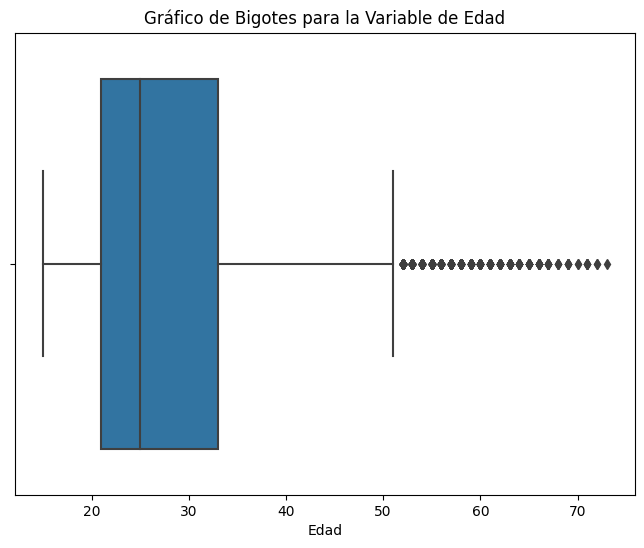

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=muestra['edad_hijo'])
plt.title('Gráfico de Bigotes para la Variable de Edad')
plt.xlabel('Edad')
plt.show()

In [ ]:
# Calcular los percentiles 25% (Q1) y 75% (Q3)
q1 = muestra['edad_hijo'].quantile(0.25)
q3 = muestra['edad_hijo'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
iqr = q3 - q1

# Calcular el límite superior del bigote
upper_whisker = q3 + 1.5 * iqr

print(f"Límite superior del bigote: {upper_whisker}")

Límite superior del bigote: 51.0


In [ ]:
muestra[muestra['edad_hijo'] > 51].shape

(1071, 130)

In [ ]:
muestra = muestra[muestra['edad_hijo'] <= upper_whisker]
muestra.shape

(26741, 130)

#### Silver

In [ ]:
muestra.shape

(26741, 130)

In [ ]:
# Guardar en silver
#muestra.to_csv(path_silver + 'geih_oci_2022_muestra.csv', index=False)

## 06. Análisis preliminar

### 06.0. Variables

In [ ]:
variables_cov = ['hijo_formal','hijo_mujer', 'jefe_mujer', 'edad_hijo', 'hijo_joven','edad_jefe', 'hijo_raza', 'jefe_formal', 'lgbt', 'discapacidad', 'campesino',
         'hijo_primaria', 'hijo_secundaria', 'hijo_media', 'hijo_tecnica', 'hijo_pregrado', 'hijo_posgrado',
         'jefe_primaria', 'jefe_secundaria', 'jefe_media', 'jefe_tecnica', 'jefe_pregrado', 'jefe_posgrado',
         'urbana', 'miembros', 'Ling_padres', 'hogar_nuclear', 'hogar_madre', 'internet', 'VariacionIPC', 'desempleo', 'tasa']

In [ ]:
muestra_cov = muestra[variables_cov]

In [ ]:
muestra_cov.head()

,hijo_formal,hijo_mujer,jefe_mujer,edad_hijo,hijo_joven,edad_jefe,hijo_raza,jefe_formal,lgbt,discapacidad,...,jefe_posgrado,urbana,miembros,Ling_padres,hogar_nuclear,hogar_madre,internet,VariacionIPC,desempleo,tasa
67,0,0,0,22.0,1,55,0,0,0,0,...,0,1,4,13.081541,1,0,0,1.67,10.82,8.77
114,0,0,0,17.0,1,54,0,1,0,0,...,0,1,4,14.419827,1,0,0,1.67,10.82,8.77
118,0,1,0,30.0,0,67,0,0,0,0,...,0,1,2,12.611538,0,0,0,1.67,10.82,8.77
132,0,0,1,28.0,0,51,0,0,0,0,...,0,1,3,12.948010,1,0,0,1.67,10.82,8.77
172,0,0,1,33.0,0,56,0,0,0,0,...,0,1,4,0.000000,0,1,0,1.67,10.82,8.77


In [ ]:
#Verificando que no haya datos nulos o faltantes.
muestra_cov.isnull().sum()

hijo_formal        0
hijo_mujer         0
jefe_mujer         0
edad_hijo          0
hijo_joven         0
edad_jefe          0
hijo_raza          0
jefe_formal        0
lgbt               0
discapacidad       0
campesino          0
hijo_primaria      0
hijo_secundaria    0
hijo_media         0
hijo_tecnica       0
hijo_pregrado      0
hijo_posgrado      0
jefe_primaria      0
jefe_secundaria    0
jefe_media         0
jefe_tecnica       0
jefe_pregrado      0
jefe_posgrado      0
urbana             0
miembros           0
Ling_padres        0
hogar_nuclear      0
hogar_madre        0
internet           0
VariacionIPC       0
desempleo          0
tasa               0
dtype: int64

In [ ]:
muestra_cov.shape

(26741, 32)

In [ ]:
muestra_cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26741 entries, 67 to 72837
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hijo_formal      26741 non-null  int64  
 1   hijo_mujer       26741 non-null  int64  
 2   jefe_mujer       26741 non-null  int64  
 3   edad_hijo        26741 non-null  float64
 4   hijo_joven       26741 non-null  int64  
 5   edad_jefe        26741 non-null  int64  
 6   hijo_raza        26741 non-null  int64  
 7   jefe_formal      26741 non-null  int64  
 8   lgbt             26741 non-null  int64  
 9   discapacidad     26741 non-null  int64  
 10  campesino        26741 non-null  int64  
 11  hijo_primaria    26741 non-null  int64  
 12  hijo_secundaria  26741 non-null  int64  
 13  hijo_media       26741 non-null  int64  
 14  hijo_tecnica     26741 non-null  int64  
 15  hijo_pregrado    26741 non-null  int64  
 16  hijo_posgrado    26741 non-null  int64  
 17  jefe_primar

In [ ]:
#Estadistica para variables numericas
pd.options.display.max_columns = None
muestra_cov.describe()

,hijo_formal,hijo_mujer,jefe_mujer,edad_hijo,hijo_joven,edad_jefe,hijo_raza,jefe_formal,lgbt,discapacidad,campesino,hijo_primaria,hijo_secundaria,hijo_media,hijo_tecnica,hijo_pregrado,hijo_posgrado,jefe_primaria,jefe_secundaria,jefe_media,jefe_tecnica,jefe_pregrado,jefe_posgrado,urbana,miembros,Ling_padres,hogar_nuclear,hogar_madre,internet,VariacionIPC,desempleo,tasa
count,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000
mean,0.357765,0.400883,0.557533,27.125126,0.573389,55.222692,0.114431,0.176358,0.010284,0.014061,0.182005,0.073857,0.126323,0.394338,0.136981,0.234509,0.024419,0.370143,0.140047,0.259751,0.070416,0.069182,0.024120,0.868890,3.557608,8.927472,0.535694,0.409371,0.050783,1.049752,11.256140,13.770965
std,0.479352,0.490086,0.496688,8.139838,0.494594,11.039744,0.318340,0.381132,0.100888,0.117744,0.385856,0.261542,0.332219,0.488717,0.343833,0.423699,0.154350,0.482852,0.347042,0.438506,0.255852,0.253768,0.153425,0.337526,1.224814,6.583795,0.498734,0.491727,0.219559,0.349673,1.511176,3.457611
min,0.000000,0.000000,0.000000,15.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.510000,9.100000,8.770000
25%,0.000000,0.000000,0.000000,21.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.810000,10.450000,10.530000
50%,0.000000,0.000000,1.000000,25.000000,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,13.122363,1.000000,0.000000,0.000000,1.000000,11.020000,12.710000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,13.955273,1.000000,1.000000,0.000000,1.260000,11.730000,16.360000
max,1.000000,1.000000,1.000000,51.000000,1.000000,103.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,18.105970,1.000000,1.000000,1.000000,1.670000,14.830000,19.590000


In [ ]:
#Estadistica para variable categorica objetivo
muestra_cov['hijo_formal'].value_counts()

0    17174
1     9567
Name: hijo_formal, dtype: int64

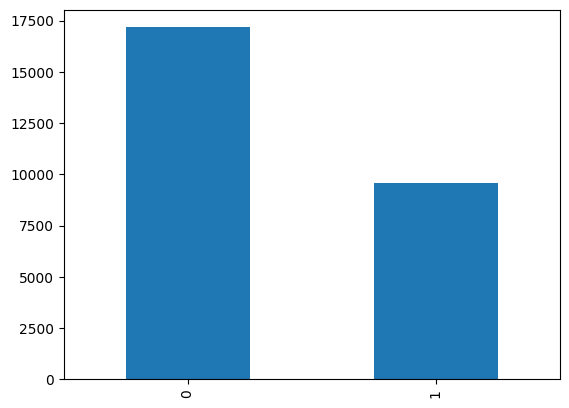

In [ ]:
#Estadistica para variable categorica objetivo
muestra_cov['hijo_formal'].value_counts().plot.bar()
plt.show()

### 06.1. Matriz de correlación

In [ ]:
#Calculemos la matriz de correlación
cor_matrix = muestra_cov.corr()
#print(cor_matrix)

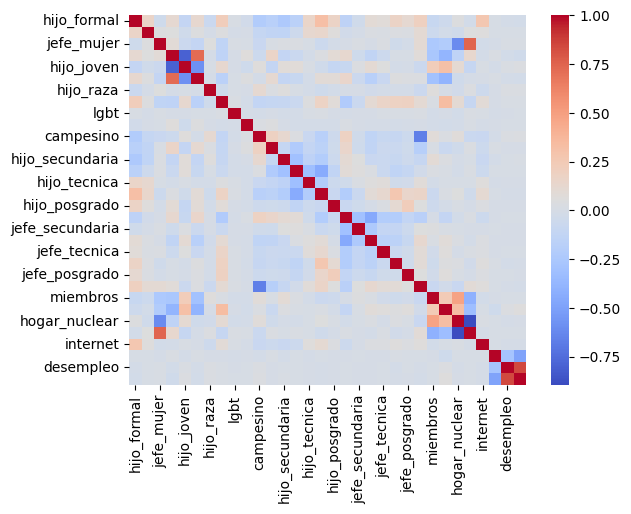

In [ ]:
# Visualicemos la matriz de correlación como una gráfica de calor
sns.heatmap(cor_matrix, cmap='coolwarm')
plt.show()

In [ ]:
threshold = 0.7
high_correlations = (cor_matrix.abs() > threshold) & (cor_matrix.abs() < 1.0)

In [ ]:
# Mostrar las variables correlacionadas junto con sus valores de correlación
for col in high_correlations.columns:
    correlated_vars = high_correlations.index[high_correlations[col]].tolist()
    for var in correlated_vars:
        correlation_value = cor_matrix.loc[var, col]
        if isinstance(correlation_value, (int, float)):
            print(f"{var} y {col} tienen una correlación de {correlation_value:.2f}")
        else:
            print(f"{var} y {col} tienen una correlación de {correlation_value}")

hogar_madre y jefe_mujer tienen una correlación de 0.74
hijo_joven y edad_hijo tienen una correlación de -0.80
edad_jefe y edad_hijo tienen una correlación de 0.72
edad_hijo y hijo_joven tienen una correlación de -0.80
edad_hijo y edad_jefe tienen una correlación de 0.72
hogar_madre y hogar_nuclear tienen una correlación de -0.89
jefe_mujer y hogar_madre tienen una correlación de 0.74
hogar_nuclear y hogar_madre tienen una correlación de -0.89
tasa y desempleo tienen una correlación de 0.84
desempleo y tasa tienen una correlación de 0.84


In [ ]:
muestra_cov.groupby(['internet', 'hijo_formal'])['hijo_formal'].count()

internet  hijo_formal
0         0              17059
          1               8324
1         0                115
          1               1243
Name: hijo_formal, dtype: int64

In [ ]:
muestra_cov.groupby(['jefe_formal', 'hijo_formal'])['hijo_formal'].count()

jefe_formal  hijo_formal
0            0              15221
             1               6804
1            0               1953
             1               2763
Name: hijo_formal, dtype: int64

In [ ]:
muestra_cov.groupby(['hijo_primaria', 'hijo_formal'])['hijo_formal'].count()

hijo_primaria  hijo_formal
0              0              15296
               1               9470
1              0               1878
               1                 97
Name: hijo_formal, dtype: int64

In [ ]:
muestra_cov.groupby(['hijo_secundaria', 'hijo_formal'])['hijo_formal'].count()

hijo_secundaria  hijo_formal
0                0              13999
                 1               9364
1                0               3175
                 1                203
Name: hijo_formal, dtype: int64

In [ ]:
muestra_cov.groupby(['hijo_media', 'hijo_formal'])['hijo_formal'].count()

hijo_media  hijo_formal
0           0              9348
            1              6848
1           0              7826
            1              2719
Name: hijo_formal, dtype: int64

In [ ]:
muestra_cov.groupby(['hijo_tecnica', 'hijo_formal'])['hijo_formal'].count()

hijo_tecnica  hijo_formal
0             0              15504
              1               7574
1             0               1670
              1               1993
Name: hijo_formal, dtype: int64

In [ ]:
muestra_cov.groupby(['hijo_pregrado', 'hijo_formal'])['hijo_formal'].count()

hijo_pregrado  hijo_formal
0              0              14887
               1               5583
1              0               2287
               1               3984
Name: hijo_formal, dtype: int64

In [ ]:
muestra_cov.groupby(['hijo_posgrado', 'hijo_formal'])['hijo_formal'].count()

hijo_posgrado  hijo_formal
0              0              17090
               1               8998
1              0                 84
               1                569
Name: hijo_formal, dtype: int64

## 07. Modelos


### Definición de variables

In [ ]:
columnas = muestra.columns.tolist()
print(columnas)

['DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 'SEXO', 'EDAD', 'PARENTESCO', 'ETNIA', 'SALUD', 'TRABAJO', 'REGIMEN', 'EDUCACION', 'CLASE', 'AREA', 'MES', 'PERIODO', 'DPTO', 'FEX_C18', 'PENSION', 'INTERNET', 'OCI', 'INGLABO', 'SALUD2', 'TIEMPO_OCI', 'LGBT_Numerica', 'Discapacidad', 'Dificultad', 'Campesina', 'VariacionIPC', 'desempleo', 'tasa', 'aux_hijo', 'hijo', 'aux_oci', 'hijo_oci', 'aux_primer', 'primer', 'aux_jefe_hom', 'aux_jefe_muj', 'jefe_hombre', 'jefe_mujer', 'hijo_hombre', 'hijo_mujer', 'aux_edad_jefe', 'edad_jefe', 'edad_hijo', 'hijo_joven', 'aux_jefe_ninguno', 'aux_jefe_primaria', 'aux_jefe_secundaria', 'aux_jefe_media', 'aux_jefe_tecnica', 'aux_jefe_pregrado', 'aux_jefe_posgrado', 'jefe_ninguno', 'jefe_primaria', 'jefe_secundaria', 'jefe_media', 'jefe_tecnica', 'jefe_pregrado', 'jefe_posgrado', 'hijo_ninguno', 'hijo_primaria', 'hijo_secundaria', 'hijo_media', 'hijo_tecnica', 'hijo_pregrado', 'hijo_posgrado', 'aux_jefe_raza', 'jefe_raza', 'hijo_raza', 'salud', 'pension', 'formal',

In [ ]:
var_x = ['jefe_formal', 'hijo_mujer', 'jefe_mujer', 'hijo_joven', 'edad_jefe', 'hijo_raza', 'jefe_raza', 'lgbt', 'discapacidad', 'campesino',
         'hijo_primaria', 'hijo_secundaria', 'hijo_media', 'hijo_tecnica', 'hijo_pregrado', 'hijo_posgrado',
         'jefe_primaria', 'jefe_secundaria', 'jefe_media', 'jefe_tecnica', 'jefe_pregrado', 'jefe_posgrado',
         'urbana', 'miembros', 'Ling_padres', 'hogar_nuclear', 'internet', 'antioquia', 'atlantico', 'bogota', 'bolivar', 'boyaca', 'caldas',
         'caqueta', 'cauca', 'cesar', 'cordoba', 'cundinamarca', 'choco', 'huila', 'guajira', 'magdalena', 'meta', 'narino', 'norte',
         'quindio', 'risaralda', 'santander', 'sucre', 'tolima', 'valle', 'VariacionIPC', 'desempleo']

In [ ]:
var_y = ['hijo_formal']

In [ ]:
muestra_pred = muestra[var_x]

In [ ]:
X = muestra_pred

In [ ]:
X.shape

(26741, 53)

In [ ]:
y = muestra[var_y]

In [ ]:
y.shape

(26741, 1)

In [ ]:
y.groupby('hijo_formal')['hijo_formal'].count()

hijo_formal
0    17174
1     9567
Name: hijo_formal, dtype: int64

In [ ]:
y.groupby('hijo_formal')['hijo_formal'].count()/y.shape[0]

hijo_formal
0    0.642235
1    0.357765
Name: hijo_formal, dtype: float64

### Selección datos de entrenamiento, validación y prueba

In [ ]:
# Separamos los conjuntos X y 'y' en datos de entrenamiento(70), validacion(15) y prueba(15) stratify para mantener proporción
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
#X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Número de registros en cada conjunto
print("Entrenamiento:", X_train.shape[0])
print("Validación:", X_val.shape[0])
print("Prueba:", X_test.shape[0])


Entrenamiento: 18718
Validación: 4011
Prueba: 4012


### Transformaciones y preprocesamiento (to-do: revisar el numeral_transformer)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    PolynomialFeatures,
    FunctionTransformer,
)

#### Experimento - Preprocesador de datos sin ajuste a escalas en datos numéricos.


In [ ]:
#Definimos las transformaciones
#cat_cols = X_train.select_dtypes(include='object').columns
#num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

#categorical_transformer = Pipeline(
#    steps=[('OrdinalEncoder', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))],
#)
#numerical_transformer = 'passthrough'

#### Experimento - Preprocesador de datos con ajuste a escalas en datos numéricos solo de variables específicas


In [ ]:
#Definimos las transformaciones
#cat_cols = X_train.select_dtypes(include='object').columns
#num_cols = ["edad_jefe", "miembros", "Ling_padres"]

#categorical_transformer = Pipeline(
#    steps=[('OrdinalEncoder', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))],
#)
#numerical_transformer = MinMaxScaler()

#### Experimento - Preprocesador de datos con ajuste a escalas en datos numéricos

In [ ]:
#Definimos las transformaciones
cat_cols = X_train.select_dtypes(include='object').columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

categorical_transformer = Pipeline(
    steps=[('OrdinalEncoder', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))],
)
numerical_transformer = MinMaxScaler()

In [ ]:
#Definimos preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_cols),
        ('num', numerical_transformer, num_cols)
    ])


### Modelo logit

#### Básico

In [ ]:
# Librerias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
#Definición de regresor
logit_base = LogisticRegression(random_state=42)

In [ ]:
#Definición de Pipeline
pipeline_logit = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', logit_base),
    ])

In [ ]:
# Entrenar el modelo
logit_model = pipeline_logit.fit(X_train, y_train)

In [ ]:
logit_model = pipeline_logit.named_steps['regressor']

In [ ]:
# Intercepto
logit_model.intercept_

array([-2.9227709])

In [ ]:
# Coeficientes
logit_model.coef_

array([[ 0.80544713,  0.19989042,  0.06883595, -0.45344482,  1.01806608,
         0.05793324, -0.04777552, -0.41559906, -0.72595125, -0.50506593,
        -0.56410498, -0.44724955,  0.98843041,  2.10594814,  2.30997943,
         3.20336053,  0.62300783,  0.676318  ,  0.88293221,  0.67557888,
         0.9273075 ,  0.83515238,  0.46197018, -0.29071247, -0.65559812,
         0.36147245,  2.51190559,  0.20517558, -0.51988987,  0.35135484,
        -1.05202101, -0.30486171,  0.28040211, -0.6703162 , -0.82221272,
        -0.98550892, -0.70497512,  0.14686219, -0.65569324, -0.23311477,
        -1.23771366, -1.00806297, -0.46758155, -0.98632458, -1.06668947,
         0.15122892,  0.23979131, -0.26528677, -1.26599471, -0.14810876,
        -0.26389888, -0.1052319 , -0.08546088]])

In [ ]:
#Obtener los parametros del modelo
logit_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Generar predicciones
predictionsLogit = pipeline_logit.predict(X_test)

In [ ]:
#Evaluar accuracy, precision, recall, F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model_accuracy = accuracy_score(y_test, predictionsLogit)
model_precision = precision_score(y_test, predictionsLogit)
model_recall = recall_score(y_test, predictionsLogit)
model_f1 = f1_score(y_test, predictionsLogit)

In [ ]:
print(f'model_accuracy: {model_accuracy}, model_precision: {model_precision}, model_recall: {model_recall}, model_f1: {model_f1}')

model_accuracy: 0.7719341974077767, model_precision: 0.7073365231259968, model_recall: 0.6181184668989547, model_f1: 0.6597248047601338


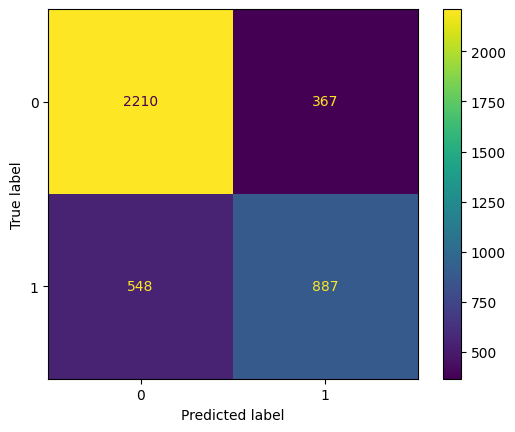

In [ ]:
#Generar matriz de confusion
ConfusionMatrixDisplay.from_estimator(pipeline_logit, X_test, y_test)

In [ ]:
#Reporte de clasificacion
print(classification_report(y_test, predictionsLogit, target_names=['Informal', 'Formal']))

              precision    recall  f1-score   support

    Informal       0.80      0.86      0.83      2577
      Formal       0.71      0.62      0.66      1435

    accuracy                           0.77      4012
   macro avg       0.75      0.74      0.74      4012
weighted avg       0.77      0.77      0.77      4012



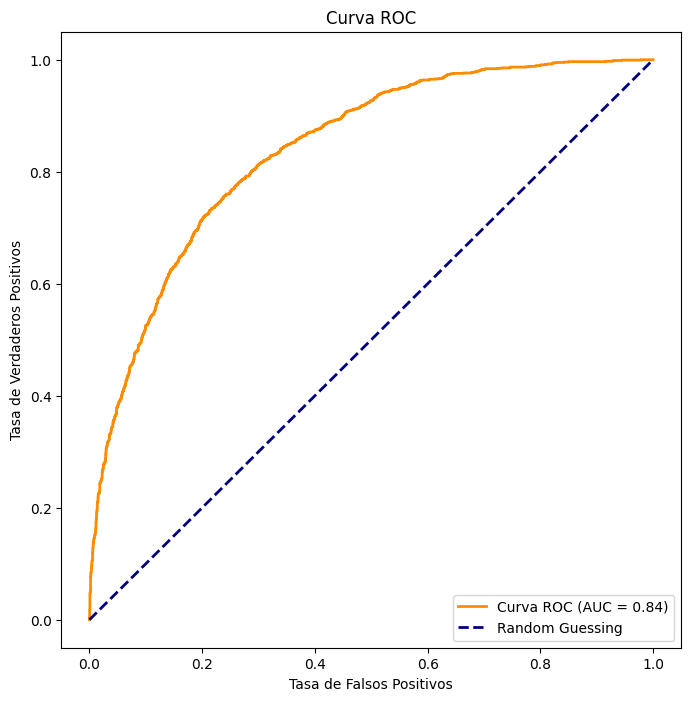

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_probs = pipeline_logit.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


#### Usando GridSearchCV

In [ ]:
# Librerias
from sklearn.model_selection import GridSearchCV

In [ ]:
#Usando gridsearchcv para exploracion de los mejores parametros

# Definir malla de parametros
param_gridSearchCV = {'regressor__C': [0.01, 0.1, 1, 10, 100],
                      'regressor__penalty': ['l1', 'l2'],
                      'regressor__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
                      #'regressor__penalty': ['elasticnet'],
                      'regressor__l1_ratio': [0.1, 0.5, 0.9],
                      'regressor__max_iter': [100, 200, 300]}

# Crear objeto GridSearchCV
GridSearchCV_logit = GridSearchCV(pipeline_logit, param_grid=param_gridSearchCV, cv=10, scoring='f1')

# Entrenar el modelo
GridSearchCV_logit.fit(X_train, y_train)

# Obtener mejores parámetros
best_paramsGridSearchCV = GridSearchCV_logit.best_params_
print('Best parameters found: ', best_paramsGridSearchCV)

Best parameters found:  {'regressor__C': 100, 'regressor__l1_ratio': 0.1, 'regressor__max_iter': 100, 'regressor__penalty': 'l2', 'regressor__solver': 'lbfgs'}


In [ ]:
# Crear un nuevo pipeline con los mejores parámetros
pipeline_best_GridSearchCV = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(random_state=42, C=best_paramsGridSearchCV['regressor__C'],
                                     l1_ratio=best_paramsGridSearchCV['regressor__l1_ratio'],
                                     max_iter=best_paramsGridSearchCV['regressor__max_iter'],
                                     penalty=best_paramsGridSearchCV['regressor__penalty'],
                                     solver=best_paramsGridSearchCV['regressor__solver']
                                     ))
])

In [ ]:
# Entrenar el modelo en el conjunto de validación
pipeline_best_GridSearchCV.fit(X_val, y_val)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('OrdinalEncoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index([], dtype='object')),
                                                 ('num', MinMaxScaler(),
                                                  Index(['jefe_formal', 'hijo_mujer', 'jefe_mujer', 'hijo_joven', 'edad_jefe',
       'hijo_raza', 'jefe_raza', 'lgbt', 'discapacidad', 'campesi...
       'antioquia', 'atlantico', 'bogota', 'bolivar', 'boyaca', 'caldas',
       'caqueta', 'cauca', 'cesar', 'cordoba', 'cundinamarca', 'choco',
       'huila', 'guajira', 'magdalena', 'meta', 'narino', 'norte', 'quindio',
       'risaralda', 'santander', 'sucre', 'tolima', 'valle', 'VariacionIPC',
       'desempleo'],
      dtype='object'))])),
                ('regressor',
                 LogisticRegression(C=100, l1_ratio=0.1, random_state=42))])

In [ ]:
# Hacer predicción en Test sobre el mejor modelo
predictions_best_modelGridSearchCV = pipeline_best_GridSearchCV.predict(X_test)

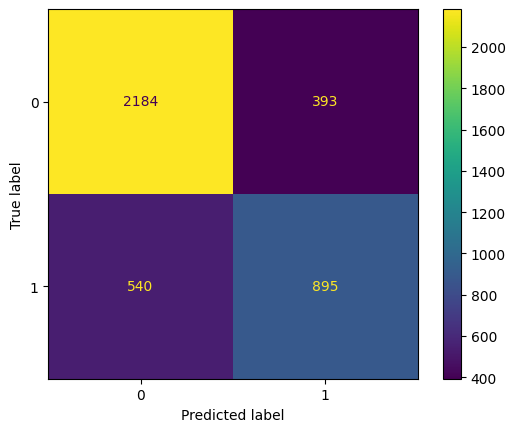

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipeline_best_GridSearchCV, X_test, y_test)

In [ ]:
print(classification_report(y_test, predictions_best_modelGridSearchCV, target_names=['Informal', 'Formal']))

              precision    recall  f1-score   support

    Informal       0.80      0.85      0.82      2577
      Formal       0.69      0.62      0.66      1435

    accuracy                           0.77      4012
   macro avg       0.75      0.74      0.74      4012
weighted avg       0.76      0.77      0.76      4012



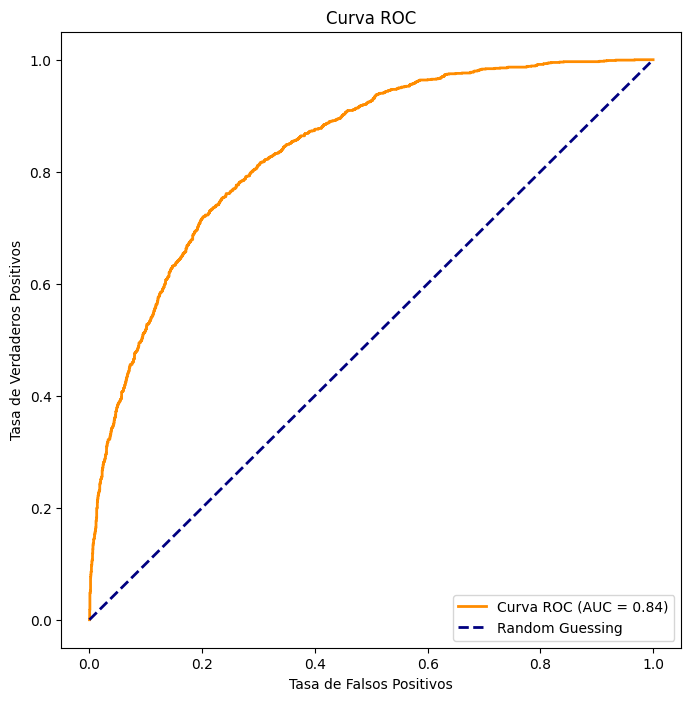

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_probs = GridSearchCV_logit.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

#### Usando RandomizedSearchCV

In [ ]:
# Librerias
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Exploracion de mejores parametros usando Randomizedsearchcv

# Definir malla de parametros
param_distRandomizedSearchCV = {'regressor__C': list(np.arange(0.01, 100)),
                      'regressor__penalty': ['l1', 'l2'],
                      'regressor__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
                      #'regressor__penalty': ['elasticnet'],
                      'regressor__l1_ratio': [0.1, 0.5, 0.9],
                      'regressor__max_iter': [100, 200, 300]}

# Crear objeto RandomizedSearchCV
RandomizedSearchCV_logit = RandomizedSearchCV(pipeline_logit, param_distributions=param_distRandomizedSearchCV, cv=10, scoring='f1')

# Entrenar el modelo
RandomizedSearchCV_logit.fit(X_train, y_train)

# Obtener mejores parámetros
best_paramsRandomizedSearchCV = RandomizedSearchCV_logit.best_params_
print('Best parameters found: ', best_paramsRandomizedSearchCV)


Best parameters found:  {'regressor__solver': 'lbfgs', 'regressor__penalty': 'l2', 'regressor__max_iter': 100, 'regressor__l1_ratio': 0.5, 'regressor__C': 85.01}


In [ ]:
# Crear un nuevo pipeline con los mejores parámetros
pipeline_best_RandomizedSearchCV = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(random_state=42, C=best_paramsRandomizedSearchCV['regressor__C'],
                                     l1_ratio=best_paramsRandomizedSearchCV['regressor__l1_ratio'],
                                     max_iter=best_paramsRandomizedSearchCV['regressor__max_iter'],
                                     penalty=best_paramsRandomizedSearchCV['regressor__penalty'],
                                     solver=best_paramsRandomizedSearchCV['regressor__solver']))
])

In [ ]:
# Entrenar el modelo en el conjunto de validación
pipeline_best_RandomizedSearchCV.fit(X_val, y_val)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('OrdinalEncoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index([], dtype='object')),
                                                 ('num', MinMaxScaler(),
                                                  Index(['jefe_formal', 'hijo_mujer', 'jefe_mujer', 'hijo_joven', 'edad_jefe',
       'hijo_raza', 'jefe_raza', 'lgbt', 'discapacidad', 'campesi...
       'antioquia', 'atlantico', 'bogota', 'bolivar', 'boyaca', 'caldas',
       'caqueta', 'cauca', 'cesar', 'cordoba', 'cundinamarca', 'choco',
       'huila', 'guajira', 'magdalena', 'meta', 'narino', 'norte', 'quindio',
       'risaralda', 'santander', 'sucre', 'tolima', 'valle', 'VariacionIPC',
       'desempleo'],
      dtype='object'))])),
                ('regressor',
                 LogisticRegression(C=85.01, l1_ratio=0.5, random_state=42))])

In [ ]:
# Hacer predicción en Test sobre el mejor modelo
predictions_best_RandomizedSearchCV = pipeline_best_RandomizedSearchCV.predict(X_test)

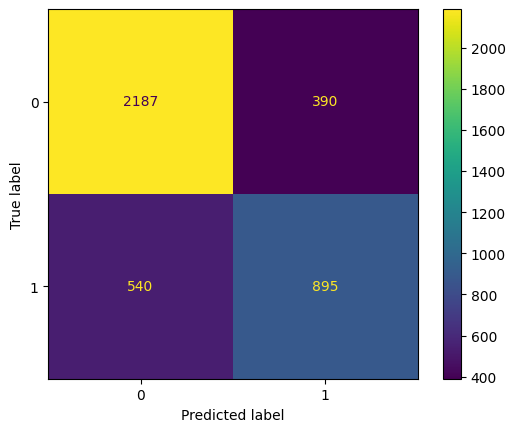

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipeline_best_RandomizedSearchCV, X_test, y_test)

In [ ]:
print(classification_report(y_test, predictions_best_RandomizedSearchCV, target_names=['Informal', 'Formal']))

              precision    recall  f1-score   support

    Informal       0.80      0.85      0.82      2577
      Formal       0.70      0.62      0.66      1435

    accuracy                           0.77      4012
   macro avg       0.75      0.74      0.74      4012
weighted avg       0.76      0.77      0.77      4012



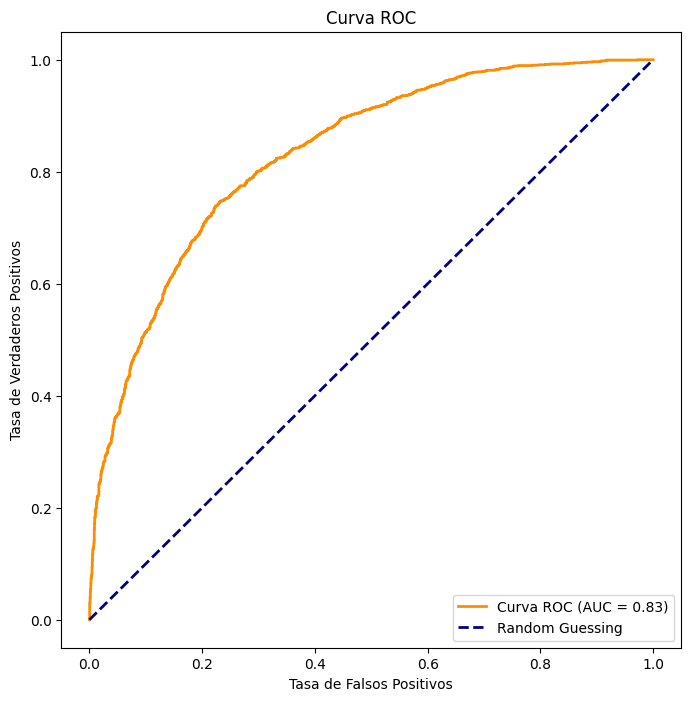

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_probs = pipeline_best_RandomizedSearchCV.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


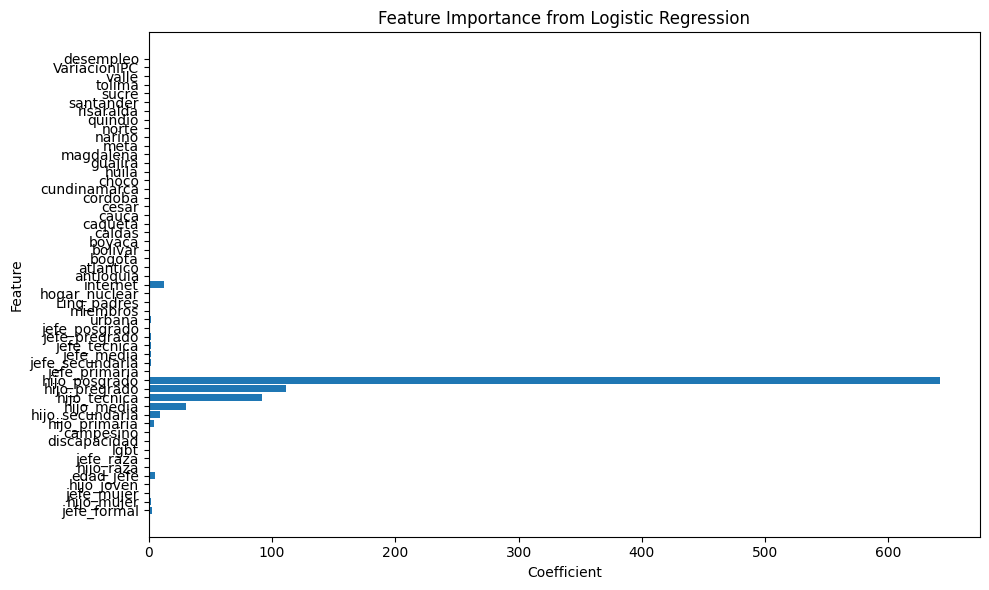

In [ ]:
# Importancia de las caracteristicas
# Get absolute coefficients from the logistic regression model
logreg_coeffs = np.exp(pipeline_best_RandomizedSearchCV.named_steps['regressor'].coef_[0])

# Get feature names
feature_names = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), logreg_coeffs, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression')
plt.tight_layout()
plt.show()


### Decision Tree

#### Básico

In [ ]:
# Librerias
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
#Definición de regresor
DecisionTreeClassifier_base = DecisionTreeClassifier(ccp_alpha=0.01)

In [ ]:
#Definición de Pipeline
pipeline_DecisionTree = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeClassifier_base),
    ])

In [ ]:
# Entrenar el modelo
modelDecisionTree = pipeline_DecisionTree.fit(X_train, y_train)

In [ ]:
#Obtener los parametros del modelo
modelDecisionTree.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('cat',
                                    Pipeline(steps=[('OrdinalEncoder',
                                                     OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                    unknown_value=-1))]),
                                    Index([], dtype='object')),
                                   ('num', MinMaxScaler(),
                                    Index(['jefe_formal', 'hijo_mujer', 'jefe_mujer', 'hijo_joven', 'edad_jefe',
          'hijo_raza', 'jefe_raza', 'lgbt', 'discapacidad', 'campesino',
          'hijo_primaria', 'hijo_secund...
          'jefe_media', 'jefe_tecnica', 'jefe_pregrado', 'jefe_posgrado',
          'urbana', 'miembros', 'Ling_padres', 'hogar_nuclear', 'internet',
          'antioquia', 'atlantico', 'bogota', 'bolivar', 'boyaca', 'caldas',
          'caqueta', 'cauca', 'cesar', 'cordoba', 'cundinamarca', 'c

In [ ]:
#Generar predicciones
predictionsDecisionTree = pipeline_DecisionTree.predict(X_test)

In [ ]:
#Evaluar accuracy, precision, recall, F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model_accuracy = accuracy_score(y_test, predictionsDecisionTree)
model_precision = precision_score(y_test, predictionsDecisionTree)
model_recall = recall_score(y_test, predictionsDecisionTree)
model_f1 = f1_score(y_test, predictionsDecisionTree)

In [ ]:
print(f'model_accuracy: {model_accuracy}, model_precision: {model_precision}, model_recall: {model_recall}, model_f1: {model_f1}')

model_accuracy: 0.744765702891326, model_precision: 0.6249240121580547, model_recall: 0.716376306620209, model_f1: 0.6675324675324675


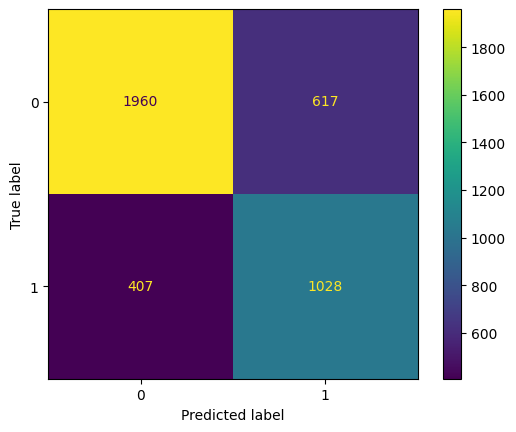

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipeline_DecisionTree, X_test, y_test)

In [ ]:
print(classification_report(y_test, predictionsDecisionTree, target_names=['Informal', 'Formal']))

              precision    recall  f1-score   support

    Informal       0.83      0.76      0.79      2577
      Formal       0.62      0.72      0.67      1435

    accuracy                           0.74      4012
   macro avg       0.73      0.74      0.73      4012
weighted avg       0.76      0.74      0.75      4012



#### Usando GridSearchCV

In [ ]:
# Librerias
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definir malla de parametros
param_grid = {
    "regressor__criterion": ["gini", "entropy"],
    "regressor__max_depth": [None, 10, 20, 30],
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 3],
    'regressor__max_features': ['auto', 'sqrt', 'log2', None],
    'regressor__splitter': ['best', 'random'],
    'regressor__max_leaf_nodes': [None, 10, 20, 30],
    'regressor__class_weight': [None, 'balanced'],
    'regressor__min_weight_fraction_leaf': [0.0, 0.1, 0.2],
}

# Crear objeto GridSearchCV
GridSearchCV_decisiontree = GridSearchCV(pipeline_DecisionTree, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1,  scoring='f1')

# Entrenar el modelo
GridSearchCV_decisiontree.fit(X_train, y_train)

# Obtener mejores parámetros
best_paramsGridSearchCV = GridSearchCV_decisiontree.best_params_
print('Best parameters found: ', best_paramsGridSearchCV)

In [ ]:
# Crear un nuevo pipeline con los mejores parámetros
pipeline_best_GridSearchCV = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeClassifier(random_state=42, criterion=best_paramsGridSearchCV['regressor__criterion'],
                                         max_depth=best_paramsGridSearchCV['regressor__max_depth'],
                                         min_samples_leaf=best_paramsGridSearchCV['regressor__min_samples_leaf'],
                                         min_samples_split=best_paramsGridSearchCV['regressor__min_samples_split'],
                                         max_features=best_paramsGridSearchCV['regressor__max_features'],
                                         splitter=best_paramsGridSearchCV['regressor__splitter'],
                                         max_leaf_nodes=best_paramsGridSearchCV['regressor__max_leaf_nodes'],
                                         class_weight=best_paramsGridSearchCV['regressor__class_weight'],
                                         min_weight_fraction_leaf=best_paramsGridSearchCV['regressor__min_weight_fraction_leaf']
                                         ))
])

In [ ]:
# Entrenar el modelo en el conjunto de validación
pipeline_best_GridSearchCV.fit(X_val, y_val)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('OrdinalEncoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index([], dtype='object')),
                                                 ('num', MinMaxScaler(),
                                                  ['edad_jefe', 'miembros',
                                                   'Ling_padres'])])),
                ('regressor',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy',
                                        random_state=42))])

In [ ]:
# Evaluate the model with best parameters on the test set
predictions_best_modelGridSearchCV = pipeline_best_GridSearchCV.predict(X_test)

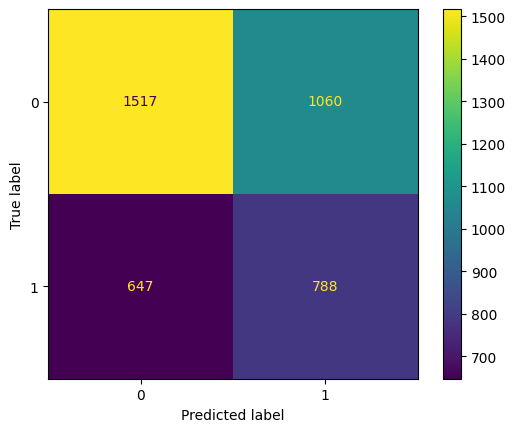

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipeline_best_GridSearchCV, X_test, y_test)

In [ ]:
print(classification_report(y_test, predictions_best_modelGridSearchCV, target_names=['Informal', 'Formal']))

              precision    recall  f1-score   support

    Informal       0.70      0.59      0.64      2577
      Formal       0.43      0.55      0.48      1435

    accuracy                           0.57      4012
   macro avg       0.56      0.57      0.56      4012
weighted avg       0.60      0.57      0.58      4012



#### Usando RandomizedSearchCV

In [ ]:
#Librerias
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Exploracion de mejores parametros usando Randomizedsearchcv

# Definir malla de parametros
param_dist = {
    "regressor__criterion": ["gini", "entropy"],
    "regressor__max_depth": [None, 10, 20, 30],
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 3],
    'regressor__max_features': ['auto', 'sqrt', 'log2', None],
    'regressor__splitter': ['best', 'random'],
    'regressor__max_leaf_nodes': [None, 10, 20, 30],
    'regressor__class_weight': [None, 'balanced'],
    'regressor__min_weight_fraction_leaf': [0.0, 0.1, 0.2],
}

# Crear objeto RandomizedSearchCV
RandomizedSearchCV_decisiontree = RandomizedSearchCV(pipeline_DecisionTree, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='f1')

# Entrenar el modelo
RandomizedSearchCV_decisiontree.fit(X_train, y_train)

# Obtener mejores parámetros
best_paramsRandomizedSearchCV = RandomizedSearchCV_decisiontree.best_params_
print('Best parameters found: ', best_paramsRandomizedSearchCV)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'regressor__splitter': 'random', 'regressor__min_weight_fraction_leaf': 0.0, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 1, 'regressor__max_leaf_nodes': 20, 'regressor__max_features': None, 'regressor__max_depth': None, 'regressor__criterion': 'gini', 'regressor__class_weight': None}


In [ ]:
# Crear un nuevo pipeline con los mejores parámetros
pipeline_best_RandomizedSearchCV = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeClassifier(random_state=42, criterion=best_paramsRandomizedSearchCV['regressor__criterion'],
                                        max_depth=best_paramsRandomizedSearchCV['regressor__max_depth'],
                                         min_samples_leaf=best_paramsRandomizedSearchCV['regressor__min_samples_leaf'],
                                         min_samples_split=best_paramsRandomizedSearchCV['regressor__min_samples_split'],
                                         max_features=best_paramsRandomizedSearchCV['regressor__max_features'],
                                         splitter=best_paramsRandomizedSearchCV['regressor__splitter'],
                                         max_leaf_nodes=best_paramsRandomizedSearchCV['regressor__max_leaf_nodes'],
                                         class_weight=best_paramsRandomizedSearchCV['regressor__class_weight'],
                                         min_weight_fraction_leaf=best_paramsRandomizedSearchCV['regressor__min_weight_fraction_leaf']
                                         ))
])

In [ ]:
# Entrenar el modelo en el conjunto de validación
pipeline_best_RandomizedSearchCV.fit(X_val, y_val)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('OrdinalEncoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index([], dtype='object')),
                                                 ('num', MinMaxScaler(),
                                                  Index(['jefe_formal', 'hijo_mujer', 'jefe_mujer', 'hijo_joven', 'edad_jefe',
       'hijo_raza', 'jefe_raza', 'lgbt', 'discapacidad', 'campesi...
       'antioquia', 'atlantico', 'bogota', 'bolivar', 'boyaca', 'caldas',
       'caqueta', 'cauca', 'cesar', 'cordoba', 'cundinamarca', 'choco',
       'huila', 'guajira', 'magdalena', 'meta', 'narino', 'norte', 'quindio',
       'risaralda', 'santander', 'sucre', 'tolima', 'valle', 'VariacionIPC',
       'desempleo'],
      dtype='object'))])),
                ('regressor',
                 DecisionTreeClassifier(max_leaf_nodes=20, min_samples_split=10,
                                        random_state=42, splitter='random'))])

In [ ]:
# Hacer predicción en Test sobre el mejor modelo
predictions_best_RandomizedSearchCV = pipeline_best_RandomizedSearchCV.predict(X_test)

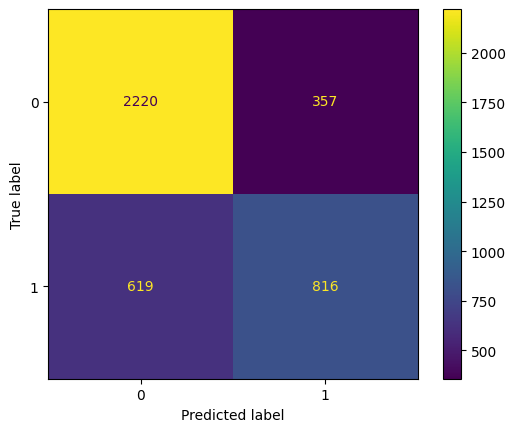

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipeline_best_RandomizedSearchCV, X_test, y_test)

In [ ]:
print(classification_report(y_test, predictions_best_RandomizedSearchCV, target_names=['Informal', 'Formal']))

              precision    recall  f1-score   support

    Informal       0.78      0.86      0.82      2577
      Formal       0.70      0.57      0.63      1435

    accuracy                           0.76      4012
   macro avg       0.74      0.72      0.72      4012
weighted avg       0.75      0.76      0.75      4012



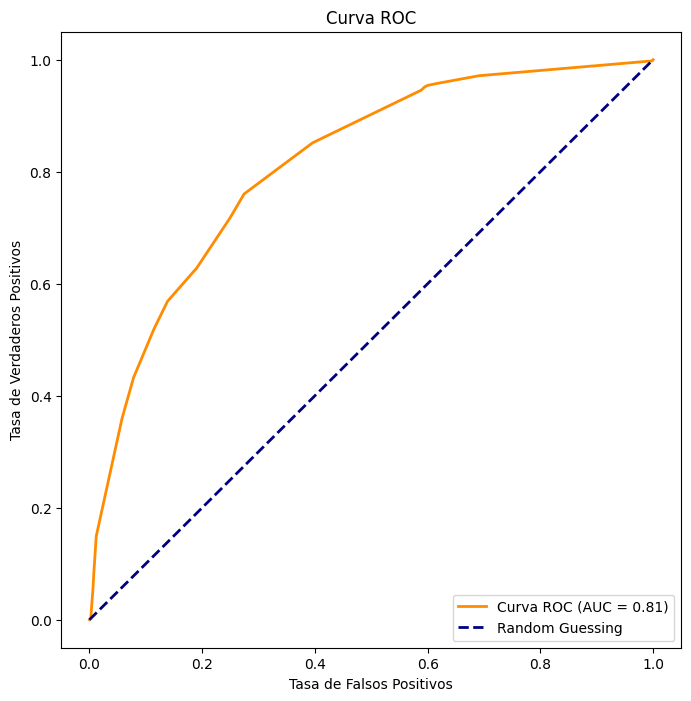

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_probs = pipeline_best_RandomizedSearchCV.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

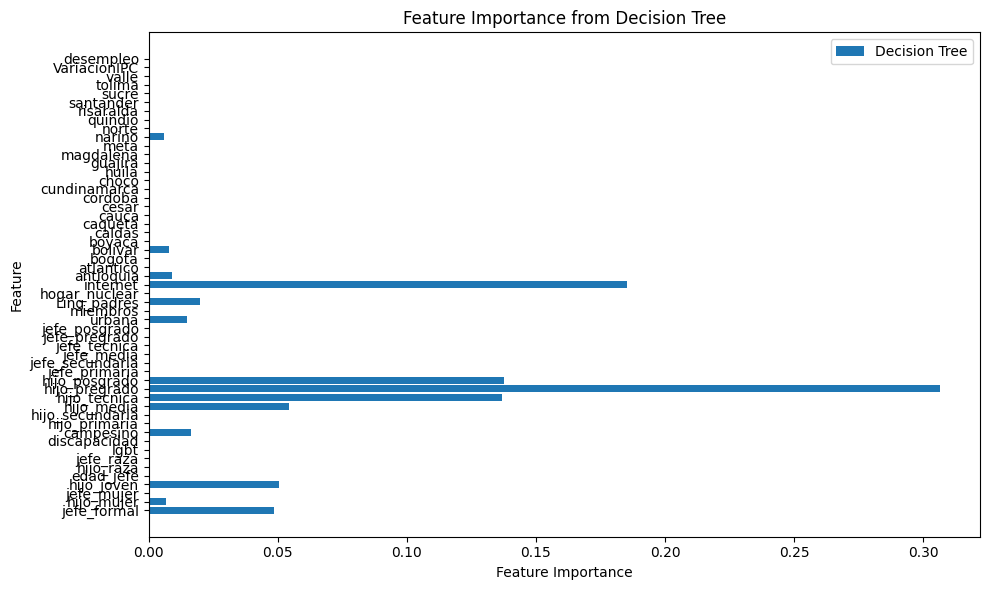

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the models
model_feature_importances = pipeline_best_RandomizedSearchCV.named_steps['regressor'].feature_importances_
#rf_feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), model_feature_importances, align='center', label='Decision Tree')
#plt.barh(range(len(feature_names)), rf_feature_importances, align='center', label='Random Forest', alpha=0.6)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree')
plt.legend()
plt.tight_layout()
plt.show()

### Random Forest

#### Básico

In [ ]:
#Librerias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
#Definición de regresor
rf_base = RandomForestClassifier(random_state=42) #ccp_alpha=0.01

In [ ]:
#Definición de Pipeline
pipeline_rf = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', rf_base),
    ])

In [ ]:
# Entrenar el modelo
model_rf = pipeline_rf.fit(X_train, y_train)

In [ ]:
#Obtener los parametros del modelo
model_rf.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('cat',
                                    Pipeline(steps=[('OrdinalEncoder',
                                                     OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                    unknown_value=-1))]),
                                    Index([], dtype='object')),
                                   ('num', MinMaxScaler(),
                                    Index(['jefe_formal', 'hijo_mujer', 'jefe_mujer', 'hijo_joven', 'edad_jefe',
          'hijo_raza', 'jefe_raza', 'lgbt', 'discapacidad', 'campesino',
          'hijo_primaria', 'hijo_secund...
          'jefe_media', 'jefe_tecnica', 'jefe_pregrado', 'jefe_posgrado',
          'urbana', 'miembros', 'Ling_padres', 'hogar_nuclear', 'internet',
          'antioquia', 'atlantico', 'bogota', 'bolivar', 'boyaca', 'caldas',
          'caqueta', 'cauca', 'cesar', 'cordoba', 'cundinamarca', 'c

In [ ]:
#Generar predicciones
predictions_rf = pipeline_rf.predict(X_test)

In [ ]:
#Evaluar accuracy, precision, recall, F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model_accuracy = accuracy_score(y_test, predictions_rf)
model_precision = precision_score(y_test, predictions_rf)
model_recall = recall_score(y_test, predictions_rf)
model_f1 = f1_score(y_test, predictions_rf)

In [ ]:
print(f'model_accuracy: {model_accuracy}, model_precision: {model_precision}, model_recall: {model_recall}, model_f1: {model_f1}')

model_accuracy: 0.7607178464606181, model_precision: 0.6898481215027977, model_recall: 0.6013937282229965, model_f1: 0.6425912137006701


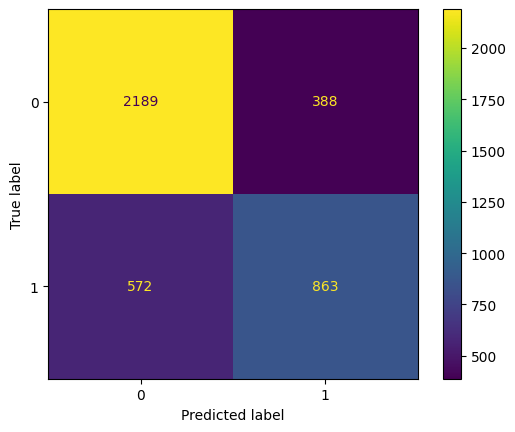

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipeline_rf, X_test, y_test)

In [ ]:
print(classification_report(y_test, predictions_rf, target_names=['Informal', 'Formal']))

              precision    recall  f1-score   support

    Informal       0.79      0.85      0.82      2577
      Formal       0.69      0.60      0.64      1435

    accuracy                           0.76      4012
   macro avg       0.74      0.73      0.73      4012
weighted avg       0.76      0.76      0.76      4012



#### Usando GridSearchCV

In [ ]:
# Librerias
from sklearn.model_selection import GridSearchCV

In [ ]:
#Usando gridsearchcv para exploracion de los mejores parametros

# Definir malla de parametros
param_grid_rf = {
    'regressor__n_estimators': [50, 100],
    'regressor__min_samples_leaf': [10, 300, 2000],
    'regressor__max_features': ['auto', 'sqrt', 'log2', None],
    'regressor__criterion': ['gini', 'entropy'],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__max_leaf_nodes': [None, 10, 20, 30],
}

# Crear objeto GridSearchCV
GridSearchCV_rf = GridSearchCV(pipeline_rf, cv=3, param_grid=param_grid_rf, n_jobs=-1, scoring='f1')


# Entrenar el modelo
GridSearchCV_rf.fit(X_train, y_train)

# Obtener mejores parámetros
best_paramsGridSearchCV = GridSearchCV_rf.best_params_
print('Best parameters found: ', best_paramsGridSearchCV)

Best parameters found:  {'regressor__criterion': 'gini', 'regressor__max_depth': None, 'regressor__max_features': None, 'regressor__max_leaf_nodes': None, 'regressor__min_samples_leaf': 10, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}


In [ ]:
# Crear un nuevo pipeline con los mejores parámetros
pipeline_best_GridSearchCV = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestClassifier(random_state=42, n_estimators=best_paramsGridSearchCV['regressor__n_estimators'],
                                         min_samples_leaf=best_paramsGridSearchCV['regressor__min_samples_leaf'],
                                         max_features=best_paramsGridSearchCV['regressor__max_features'],
                                         criterion=best_paramsGridSearchCV['regressor__criterion'],
                                         max_depth=best_paramsGridSearchCV['regressor__max_depth'],
                                         min_samples_split=best_paramsGridSearchCV['regressor__min_samples_split'],
                                         max_leaf_nodes=best_paramsGridSearchCV['regressor__max_leaf_nodes'],
                                         ))
])

NameError: ignored

In [ ]:
# Entrenar el modelo en el conjunto de validación
pipeline_best_GridSearchCV.fit(X_val, y_val)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('OrdinalEncoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index([], dtype='object')),
                                                 ('num', MinMaxScaler(),
                                                  ['edad_jefe', 'miembros',
                                                   'Ling_padres'])])),
                ('regressor',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=10,
                                        random_state=42))])

In [ ]:
# Hacer predicción en Test sobre el mejor modelo
predictions_best_modelGridSearchCV = pipeline_best_GridSearchCV.predict(X_test)

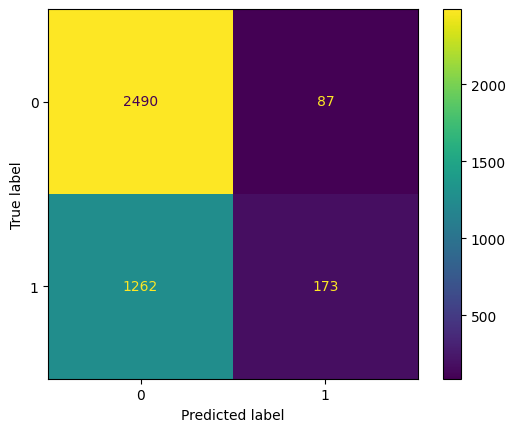

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipeline_best_GridSearchCV, X_test, y_test)

In [ ]:
print(classification_report(y_test, predictions_best_modelGridSearchCV, target_names=['Informal', 'Formal']))

              precision    recall  f1-score   support

    Informal       0.66      0.97      0.79      2577
      Formal       0.67      0.12      0.20      1435

    accuracy                           0.66      4012
   macro avg       0.66      0.54      0.50      4012
weighted avg       0.66      0.66      0.58      4012



#### Usando RandomizedSearchCV

In [ ]:
#Librerias
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Exploracion de mejores parametros usando Randomizedsearchcv

# Definir malla de parametros
param_dist_rf = {
    'regressor__n_estimators': [50, 100],
    'regressor__min_samples_leaf': [10, 300, 2000],
    'regressor__max_features': ['auto', 'sqrt', 'log2', None],
    'regressor__criterion': ['gini', 'entropy'],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__max_leaf_nodes': [None, 10, 20, 30],
}


# Crear objeto RandomizedSearchCV
RandomizedSearchCV_rf = RandomizedSearchCV(pipeline_rf, param_distributions=param_dist_rf, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='f1')

# Entrenar el modelo
RandomizedSearchCV_rf.fit(X_train, y_train)

# Obtener mejores parámetros
best_paramsRandomizedSearchCV = RandomizedSearchCV_rf.best_params_
print('Best parameters found: ', best_paramsRandomizedSearchCV)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'regressor__n_estimators': 50, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 10, 'regressor__max_leaf_nodes': None, 'regressor__max_features': None, 'regressor__max_depth': 20, 'regressor__criterion': 'gini'}


In [ ]:
# Crear un nuevo pipeline con los mejores parámetros
pipeline_best_RandomizedSearchCV = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestClassifier(random_state=42, n_estimators=best_paramsRandomizedSearchCV['regressor__n_estimators'],
                                         max_depth=best_paramsRandomizedSearchCV['regressor__max_depth'],
                                         min_samples_leaf=best_paramsRandomizedSearchCV['regressor__min_samples_leaf'],
                                         max_features=best_paramsRandomizedSearchCV['regressor__max_features'],
                                         criterion=best_paramsRandomizedSearchCV['regressor__criterion'],
                                         min_samples_split=best_paramsRandomizedSearchCV['regressor__min_samples_split'],
                                         max_leaf_nodes=best_paramsRandomizedSearchCV['regressor__max_leaf_nodes'],
                                         ))
])

In [ ]:
# Entrenar el modelo en el conjunto de validación
pipeline_best_RandomizedSearchCV.fit(X_val, y_val)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('OrdinalEncoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index([], dtype='object')),
                                                 ('num', MinMaxScaler(),
                                                  Index(['jefe_formal', 'hijo_mujer', 'jefe_mujer', 'hijo_joven', 'edad_jefe',
       'hijo_raza', 'jefe_raza', 'lgbt', 'discapacidad', 'campesi...
       'antioquia', 'atlantico', 'bogota', 'bolivar', 'boyaca', 'caldas',
       'caqueta', 'cauca', 'cesar', 'cordoba', 'cundinamarca', 'choco',
       'huila', 'guajira', 'magdalena', 'meta', 'narino', 'norte', 'quindio',
       'risaralda', 'santander', 'sucre', 'tolima', 'valle', 'VariacionIPC',
       'desempleo'],
      dtype='object'))])),
                ('regressor',
                 RandomForestClassifier(max_depth=20, max_features=None,
                                        min_samples_leaf=10, n_estimators=50,
                                        random_state=42))])

In [ ]:
# Hacer predicción en Test sobre el mejor modelo
predictions_best_RandomizedSearchCV = pipeline_best_RandomizedSearchCV.predict(X_test)

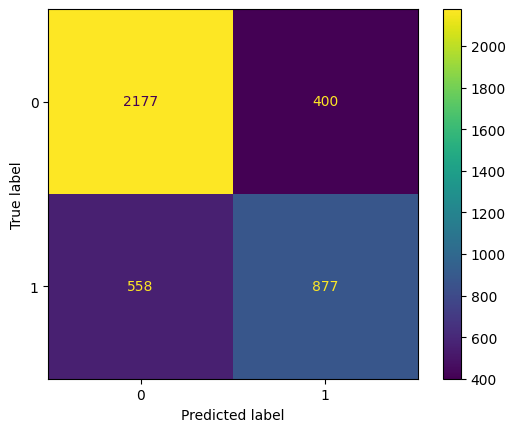

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipeline_best_RandomizedSearchCV, X_test, y_test)

In [ ]:
print(classification_report(y_test, predictions_best_RandomizedSearchCV, target_names=['Informal', 'Formal']))

              precision    recall  f1-score   support

    Informal       0.80      0.84      0.82      2577
      Formal       0.69      0.61      0.65      1435

    accuracy                           0.76      4012
   macro avg       0.74      0.73      0.73      4012
weighted avg       0.76      0.76      0.76      4012



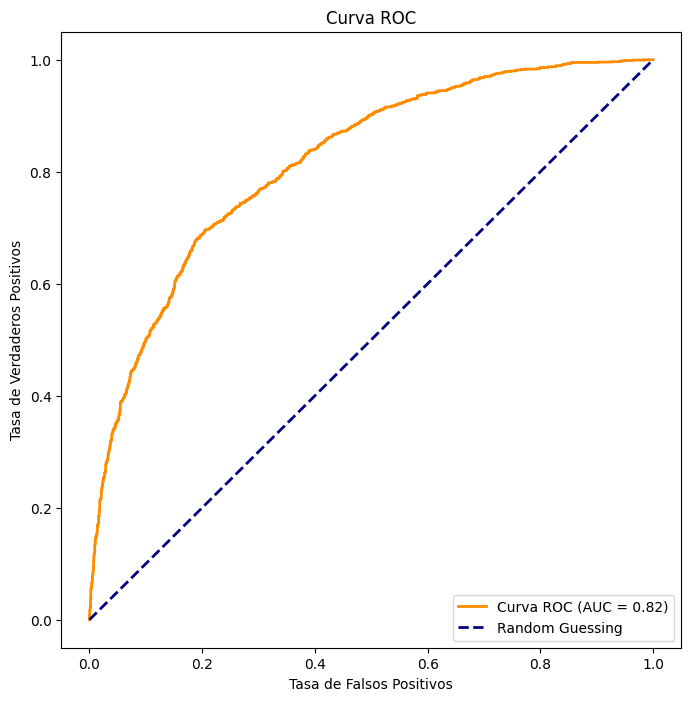

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_probs = pipeline_best_RandomizedSearchCV.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

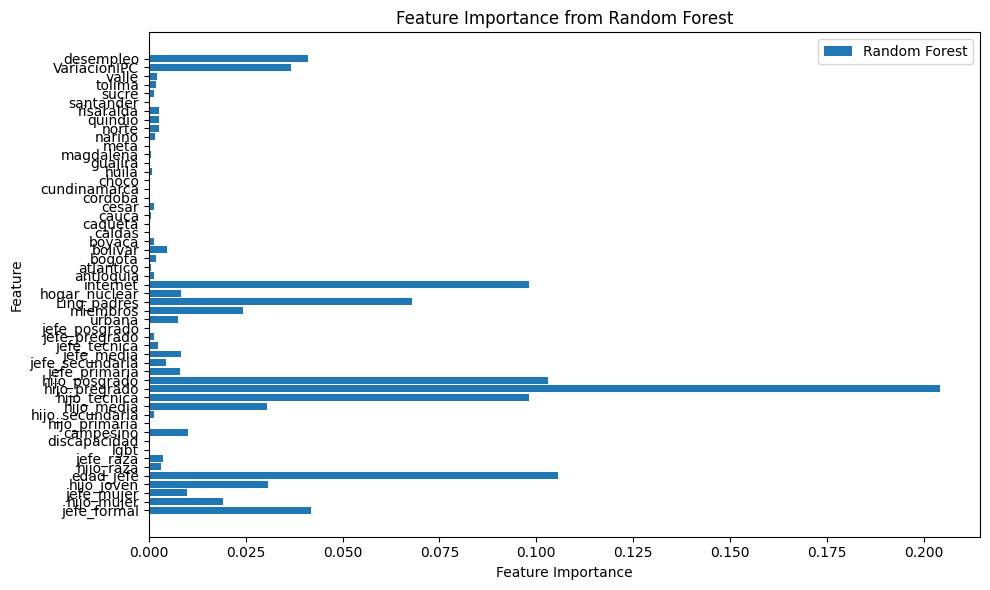

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the models
model_feature_importances = pipeline_best_RandomizedSearchCV.named_steps['regressor'].feature_importances_

# Get feature names
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), model_feature_importances, align='center', label='Random Forest')
#plt.barh(range(len(feature_names)), rf_feature_importances, align='center', label='Random Forest', alpha=0.6)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.legend()
plt.tight_layout()
plt.show()

### XGBoost

#### Básico

In [ ]:
#Librerias
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
#Definición de regresor
gb_base = GradientBoostingClassifier(random_state=42)

In [ ]:
#Definición de Pipeline
pipeline_gb = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', gb_base),
    ])

In [ ]:
# Entrenar el modelo
model_gb = pipeline_gb.fit(X_train, y_train)

In [ ]:
#Obtener los parametros del modelo
model_gb.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('cat',
                                    Pipeline(steps=[('OrdinalEncoder',
                                                     OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                    unknown_value=-1))]),
                                    Index([], dtype='object')),
                                   ('num', MinMaxScaler(),
                                    Index(['jefe_formal', 'hijo_mujer', 'jefe_mujer', 'hijo_joven', 'edad_jefe',
          'hijo_raza', 'jefe_raza', 'lgbt', 'discapacidad', 'campesino',
          'hijo_primaria', 'hijo_secund...
          'jefe_media', 'jefe_tecnica', 'jefe_pregrado', 'jefe_posgrado',
          'urbana', 'miembros', 'Ling_padres', 'hogar_nuclear', 'internet',
          'antioquia', 'atlantico', 'bogota', 'bolivar', 'boyaca', 'caldas',
          'caqueta', 'cauca', 'cesar', 'cordoba', 'cundinamarca', 'c

In [ ]:
#Generar predicciones
predictions_gb = pipeline_gb.predict(X_test)

In [ ]:
#Evaluar accuracy, precision, recall, F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model_accuracy = accuracy_score(y_test, predictions_gb)
model_precision = precision_score(y_test, predictions_gb)
model_recall = recall_score(y_test, predictions_gb)
model_f1 = f1_score(y_test, predictions_gb)

In [ ]:
print(f'model_accuracy: {model_accuracy}, model_precision: {model_precision}, model_recall: {model_recall}, model_f1: {model_f1}')

model_accuracy: 0.7716849451645065, model_precision: 0.7104622871046229, model_recall: 0.6104529616724739, model_f1: 0.6566716641679161


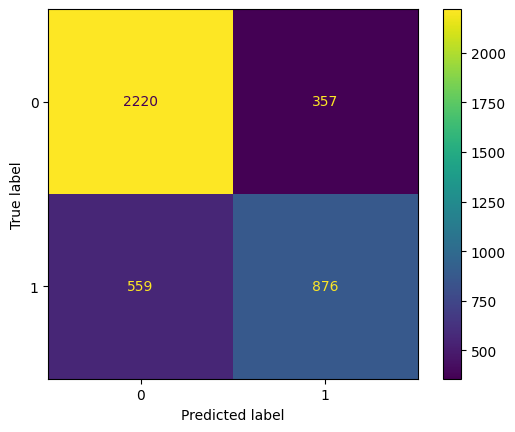

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipeline_gb, X_test, y_test)

In [ ]:
print(classification_report(y_test, predictions_gb, target_names=['Informal', 'Formal']))

              precision    recall  f1-score   support

    Informal       0.80      0.86      0.83      2577
      Formal       0.71      0.61      0.66      1435

    accuracy                           0.77      4012
   macro avg       0.75      0.74      0.74      4012
weighted avg       0.77      0.77      0.77      4012



#### Usando GridSearchCV

In [ ]:
# Librerias
from sklearn.model_selection import GridSearchCV

In [ ]:
#Usando gridsearchcv para exploracion de los mejores parametros

# Definir malla de parametros
param_grid_gb = {
    'regressor__max_depth': [3, 4, 5],
    'regressor__n_estimators': [50, 100, 200],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__subsample': [0.8, 0.9, 1.0],
    'regressor__max_features': ['auto', 'sqrt', 'log2', None],
    'regressor__max_leaf_nodes': [None, 10, 20, 30],
    'regressor__max_depth': [3, 4, 5, 6],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__min_samples_leaf': [1, 2, 4, 8],
}

# Crear objeto GridSearchCV
GridSearchCV_gb = GridSearchCV(pipeline_gb, cv=3, param_grid=param_grid_gb, n_jobs=-1)

# Entrenar el modelo
GridSearchCV_gb.fit(X_train, y_train)

# Obtener mejores parámetros
best_paramsGridSearchCV = GridSearchCV_gb.best_params_
print('Best parameters found: ', best_paramsGridSearchCV)

KeyboardInterrupt: ignored

In [ ]:
# Crear un nuevo pipeline con los mejores parámetros
pipeline_best_GridSearchCV = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingClassifier(random_state=42,
                                         max_depth=best_paramsGridSearchCV['regressor__max_depth'],
                                         n_estimators=best_paramsGridSearchCV['regressor__n_estimators'],
                                         learning_rate=best_paramsGridSearchCV['regressor__learning_rate'],
                                         min_samples_split=best_paramsGridSearchCV['regressor__min_samples_split'],
                                         min_samples_leaf=best_paramsGridSearchCV['regressor__min_samples_leaf'],
                                         subsample=best_paramsGridSearchCV['regressor__subsample'],
                                         max_features=best_paramsGridSearchCV['regressor__max_features'],
                                         max_leaf_nodes=best_paramsGridSearchCV['regressor__max_leaf_nodes'],
                                         max_depth=best_paramsGridSearchCV['regressor__max_depth'],
                                         learning_rate=best_paramsGridSearchCV['regressor__learning_rate'],
                                         min_samples_leaf=best_paramsGridSearchCV['regressor__min_samples_leaf']
                                             ))
])

In [ ]:
# Entrenar el modelo en el conjunto de validación
pipeline_best_GridSearchCV.fit(X_val, y_val)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('OrdinalEncoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index([], dtype='object')),
                                                 ('num', MinMaxScaler(),
                                                  ['edad_jefe', 'miembros',
                                                   'Ling_padres'])])),
                ('regressor',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            min_samples_split=5,
                                            n_estimators=50, random_state=42,
                                            subsample=0.8))])

In [ ]:
# Hacer predicción en Test sobre el mejor modelo
predictions_best_modelGridSearchCV = pipeline_best_GridSearchCV.predict(X_test)

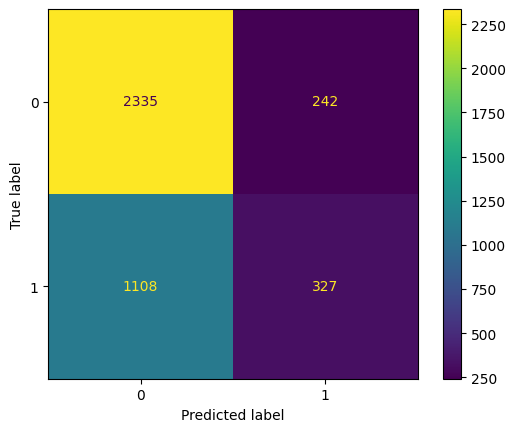

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipeline_best_GridSearchCV, X_test, y_test)

In [ ]:
print(classification_report(y_test, predictions_best_modelGridSearchCV, target_names=['Informal', 'Formal']))

              precision    recall  f1-score   support

    Informal       0.68      0.91      0.78      2577
      Formal       0.57      0.23      0.33      1435

    accuracy                           0.66      4012
   macro avg       0.63      0.57      0.55      4012
weighted avg       0.64      0.66      0.62      4012



#### Usando RandomizedSearchCV

In [ ]:
#Librerias
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [ ]:
#Exploracion de mejores parametros usando Randomizedsearchcv

# Definir malla de parametros
param_dist_gb = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__subsample': [0.8, 0.9, 1.0],
    'regressor__max_features': ['auto', 'sqrt', 'log2', None],
    'regressor__max_leaf_nodes': [None, 10, 20, 30],
    'regressor__max_depth': [3, 4, 5, 6],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__min_samples_leaf': [1, 2, 4, 8],
}

# Crear objeto RandomizedSearchCV
RandomizedSearchCV_gb = RandomizedSearchCV(pipeline_gb, param_distributions=param_dist_gb, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Entrenar el modelo
RandomizedSearchCV_gb.fit(X_train, y_train)

# Obtener mejores parámetros
best_paramsRandomizedSearchCV = RandomizedSearchCV_gb.best_params_
print('Best parameters found: ', best_paramsRandomizedSearchCV)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'regressor__subsample': 0.8, 'regressor__n_estimators': 200, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 4, 'regressor__max_leaf_nodes': 10, 'regressor__max_features': 'log2', 'regressor__max_depth': 3, 'regressor__learning_rate': 0.2}


In [ ]:
# Crear un nuevo pipeline con los mejores parámetros
pipeline_best_RandomizedSearchCV = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingClassifier(random_state=42, n_estimators=best_paramsRandomizedSearchCV['regressor__n_estimators'],
                                         learning_rate=best_paramsRandomizedSearchCV['regressor__learning_rate'],
                                         max_depth=best_paramsRandomizedSearchCV['regressor__max_depth'],
                                         min_samples_split=best_paramsRandomizedSearchCV['regressor__min_samples_split'],
                                         min_samples_leaf=best_paramsRandomizedSearchCV['regressor__min_samples_leaf'],
                                         subsample=best_paramsRandomizedSearchCV['regressor__subsample'],
                                         max_features=best_paramsRandomizedSearchCV['regressor__max_features'],
                                         max_leaf_nodes=best_paramsRandomizedSearchCV['regressor__max_leaf_nodes']
                                         ))
])

In [ ]:
# Entrenar el modelo en el conjunto de validación
pipeline_best_RandomizedSearchCV.fit(X_val, y_val)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('OrdinalEncoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index([], dtype='object')),
                                                 ('num', MinMaxScaler(),
                                                  Index(['jefe_formal', 'hijo_mujer', 'jefe_mujer', 'hijo_joven', 'edad_jefe',
       'hijo_raza', 'jefe_raza', 'lgbt', 'discapacidad', 'campesi...
       'caqueta', 'cauca', 'cesar', 'cordoba', 'cundinamarca', 'choco',
       'huila', 'guajira', 'magdalena', 'meta', 'narino', 'norte', 'quindio',
       'risaralda', 'santander', 'sucre', 'tolima', 'valle', 'VariacionIPC',
       'desempleo'],
      dtype='object'))])),
                ('regressor',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            max_features='log2',
                                            max_leaf_nodes=10,
                                            min_samples_leaf=4,
                                            min_samples_split=5,
                                            n_estimators=200, random_state=42,
                                            subsample=0.8))])

In [ ]:
# Hacer predicción en Test sobre el mejor modelo
predictions_best_RandomizedSearchCV = pipeline_best_RandomizedSearchCV.predict(X_test)

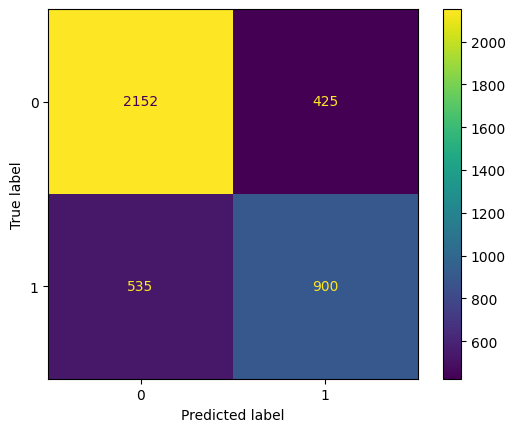

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipeline_best_RandomizedSearchCV, X_test, y_test)

In [ ]:
print(classification_report(y_test, predictions_best_RandomizedSearchCV, target_names=['Informal', 'Formal']))

              precision    recall  f1-score   support

    Informal       0.80      0.84      0.82      2577
      Formal       0.68      0.63      0.65      1435

    accuracy                           0.76      4012
   macro avg       0.74      0.73      0.73      4012
weighted avg       0.76      0.76      0.76      4012



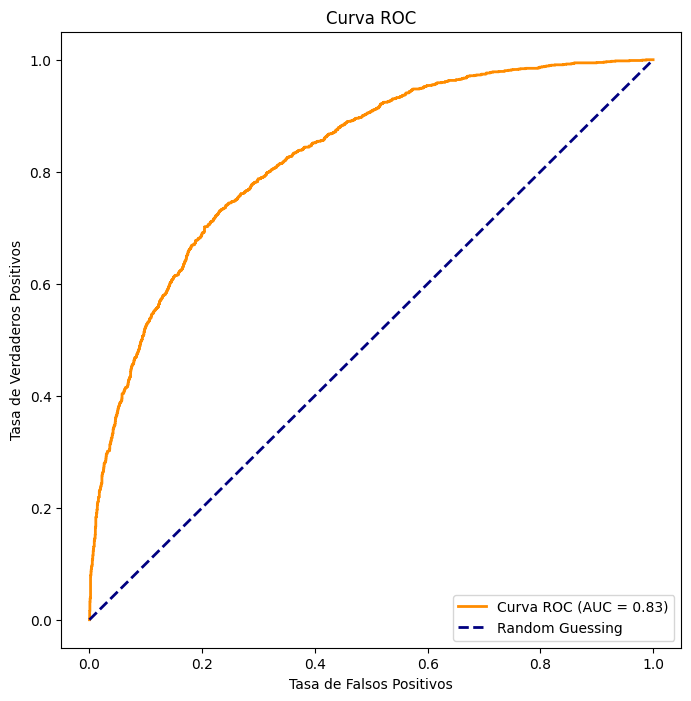

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_probs = pipeline_best_RandomizedSearchCV.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

### SHAP a modelo seleccionado

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 11.1 MB/s eta 0:00:00


In [ ]:
import shap
from IPython.display import HTML

In [ ]:
pipeline_best_RandomizedSearchCV.set_params(**RandomizedSearchCV_gb.best_params_)
pipeline_best_RandomizedSearchCV.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('OrdinalEncoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index([], dtype='object')),
                                                 ('num', MinMaxScaler(),
                                                  Index(['jefe_formal', 'hijo_mujer', 'jefe_mujer', 'hijo_joven', 'edad_jefe',
       'hijo_raza', 'jefe_raza', 'lgbt', 'discapacidad', 'campesi...
       'caqueta', 'cauca', 'cesar', 'cordoba', 'cundinamarca', 'choco',
       'huila', 'guajira', 'magdalena', 'meta', 'narino', 'norte', 'quindio',
       'risaralda', 'santander', 'sucre', 'tolima', 'valle', 'VariacionIPC',
       'desempleo'],
      dtype='object'))])),
                ('regressor',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            max_features='log2',
                                            max_leaf_nodes=10,
                                            min_samples_leaf=4,
                                            min_samples_split=5,
                                            n_estimators=200, random_state=42,
                                            subsample=0.8))])

In [ ]:
# Aplicamos el preproceso a los datos
X_train_preprocessed = pipeline_best_RandomizedSearchCV.named_steps['preprocessor'].transform(X_train)
X_test_preprocessed = pipeline_best_RandomizedSearchCV.named_steps['preprocessor'].transform(X_test)

In [ ]:
xgboost_explainer = shap.TreeExplainer(pipeline_best_RandomizedSearchCV.named_steps["regressor"])
train_rf_shap_values = xgboost_explainer.shap_values(X_train_preprocessed)

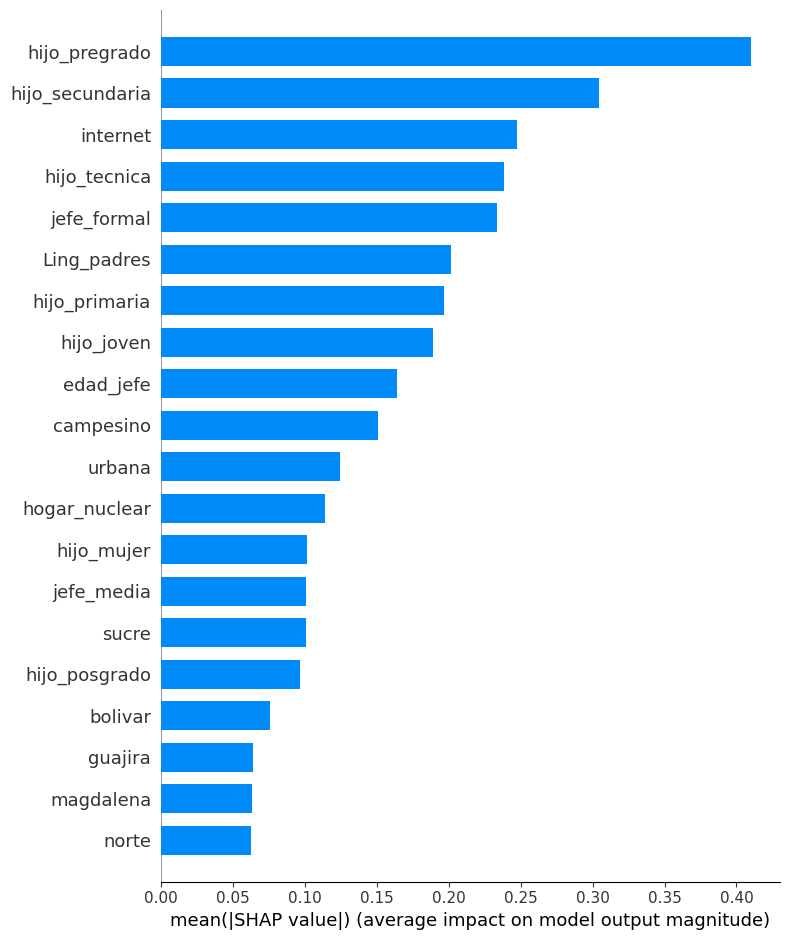

In [ ]:
shap.summary_plot(train_rf_shap_values, X_train_preprocessed, plot_type="bar", feature_names=X.columns)

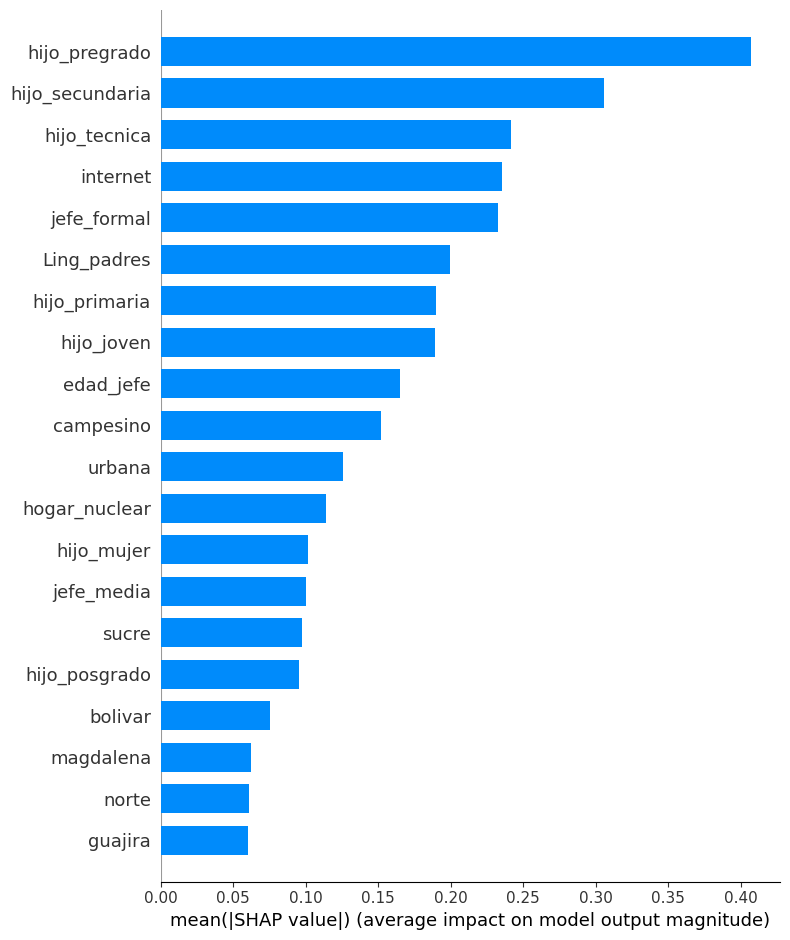

In [ ]:
test_xgboost_shap_values = xgboost_explainer.shap_values(X_test_preprocessed)
shap.summary_plot(test_xgboost_shap_values, X_test_preprocessed, plot_type="bar", feature_names=X.columns)

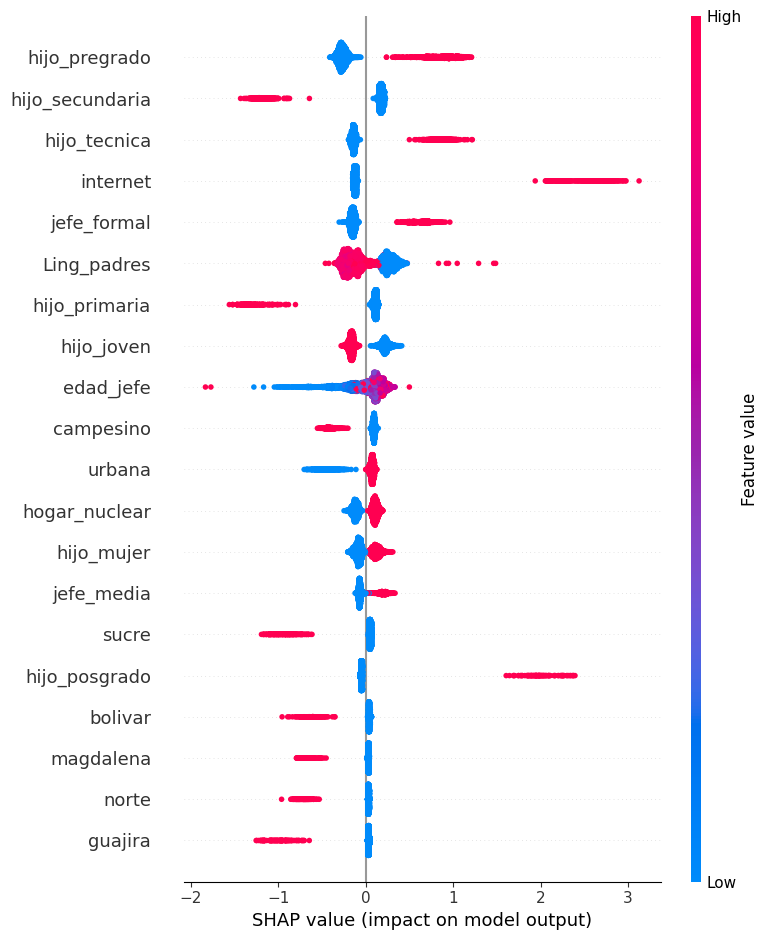

In [ ]:
#Con datos de testeo, vista default bee
shap.summary_plot(test_xgboost_shap_values, X_test_preprocessed, feature_names=X.columns)

In [ ]:
# Generar un gráfico de dependencia para la variable xxxxx
#shap.dependence_plot(13, test_rf_shap_values, X_test_preprocessed)